# Walmart Capstone Project

## 1.1 Importing Necessary Libraries
Pandas: Python library for data manipulation and analysis, providing data structures and functions for efficiently handling structured data.

Numpy: Numerical Python library for numerical computing, providing arrays, matrices, and a collection of mathematical functions to operate on these data structures.

Matplotlib: Python plotting library for creating static, interactive, and animated visualizations, enabling users to generate a wide variety of plots and charts.

Seaborn: Statistical data visualization library based on Matplotlib, offering additional high-level interface functions for creating informative and attractive statistical graphics.

from statsmodels.tsa.statespace.sarimax import SARIMAX: Imports SARIMAX class from the statespace module of the statsmodels library, which is used for fitting SARIMA (Seasonal Autoregressive Integrated Moving Average) models to time series data.
from statsmodels.tsa.seasonal import

seasonal_decompose: Imports the seasonal_decompose function from the tsa (Time Series Analysis) module of the statsmodels library, which is used for decomposing time series data into trend, seasonal, and residual components.

statsmodels.graphics.tsaplots import plot_acf, plot_pacf: Imports the plot_acf and plot_pacf functions from the tsaplots (Time Series Analysis Plots) module of the statsmodels library, which are used to plot the autocorrelation function (ACF) and partial autocorrelation function (PACF) of a time series, respectively.

statsmodels.tsa.stattools import adfuller: Imports the adfuller function from the stattools module of the statsmodels library, which is used to perform the Augmented Dickey-Fuller test for testing the stationarity of a time series.

sklearn.metrics import mean_squared_error: Imports the mean_squared_error function from the metrics module of the scikit-learn library, which is used to calculate the mean squared error (MSE) between two sets of data, typically used for evaluating the performance of regression models.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error


#from google.colab import drive
#drive.mount('/content/drive')

#1.2 Reading Data and Understanding Features

In [2]:
df = pd.read_csv('/content/Walmart.csv')

----

#Question 1: . Using the above data, come up with useful insights that can be used by each of the stores to improve in various areas.


In [3]:
df.head()

Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1  05-02-2010    1643690.90             0        42.31       2.572   
1      1  12-02-2010    1641957.44             1        38.51       2.548   
2      1  19-02-2010    1611968.17             0        39.93       2.514   
3      1  26-02-2010    1409727.59             0        46.63       2.561   
4      1  05-03-2010    1554806.68             0        46.50       2.625   

          CPI  Unemployment  
0  211.096358         8.106  
1  211.242170         8.106  
2  211.289143         8.106  
3  211.319643         8.106  
4  211.350143         8.106

**Overview of the eatures in the dataset, tabular dataset with following columns **

**Store**: This feature represents the unique identifier for each store in the dataset. Each store is assigned a distinct number for identification purposes.

**Date**: Date indicates the specific date of the weekly purchase recorded in the dataset. It allows tracking sales over time and identifying any temporal patterns or trends. Format appear to be DD-MM-YYYY (day-month-year)

**Weekly_Sales**: Weekly_Sales denotes the total sales made during a particular week. It serves as the target variable in predictive modeling tasks, aiming to predict future sales based on other features.

**Holiday_Flag**: Holiday_Flag is a binary indicator representing whether a particular week includes a holiday or not, which has an influence on the purchase. It takes the value 1 if there is a holiday during that week and 0 otherwise.

**Temperature**: Temperature denotes the temperature recorded in the region. It provides information about weather conditions, which may influence consumer behavior and affect sales.

**Fuel_Price**: Fuel_Price indicates the price of fuel in the region where each store operates. Changes in fuel prices can impact transportation costs and ultimately affect retail sales.

**CPI (Customer Price Index)**: CPI reflects the Customer Price Index, which measures the average change over time in the prices paid by consumers for a basket of goods and services. It helps in understanding the purchasing power of consumers in the region.

**Unemployment**: Unemployment represents the unemployment rate in the region where each store is situated. High unemployment rates may lead to lower consumer spending and subsequently impact sales performance.

In [4]:
df.head()

Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1  05-02-2010    1643690.90             0        42.31       2.572   
1      1  12-02-2010    1641957.44             1        38.51       2.548   
2      1  19-02-2010    1611968.17             0        39.93       2.514   
3      1  26-02-2010    1409727.59             0        46.63       2.561   
4      1  05-03-2010    1554806.68             0        46.50       2.625   

          CPI  Unemployment  
0  211.096358         8.106  
1  211.242170         8.106  
2  211.289143         8.106  
3  211.319643         8.106  
4  211.350143         8.106

Our objective is to forecast weekly sales by analyzing features like store ID, date, holiday flag, temperature, fuel price, CPI, and unemployment, each rows  in the dataset represents the particular store weekly sales , considering other features in the dataset,  holidays and weather conditions can significantly impact sales, during holidays often boosting sales, while adverse weather can deter customers. Fluctuations in fuel prices, CPI, and unemployment rates also affect consumer behavior and purchasing power. By understanding these influences, we aim to develop predictive models to forecast sales trends accurately. These models empower retailers to make informed decisions on inventory, marketing, and resource allocation for optimizing sales performance.

# 2.0 Exploratory Data Analysis *EDA*

In [5]:
df.info() # Infomation summary about the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In summary: "The dataset contains 6435 observations and 8 columns, with no missing values. The DataFrame includes columns of integer, float, and object data types.

In [6]:
df.shape # Shape : 6435 rows and 8 columns

(6435, 8)

In [7]:
df.isnull().sum() # Dataframe shows missing values across all cols

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [8]:
df.duplicated().sum() # Dataframe shows duplicate values across all cols

0

In [9]:
df.describe(include = ['int', 'float'])

Store  Weekly_Sales  Holiday_Flag  Temperature   Fuel_Price  \
count  6435.000000  6.435000e+03   6435.000000  6435.000000  6435.000000   
mean     23.000000  1.046965e+06      0.069930    60.663782     3.358607   
std      12.988182  5.643666e+05      0.255049    18.444933     0.459020   
min       1.000000  2.099862e+05      0.000000    -2.060000     2.472000   
25%      12.000000  5.533501e+05      0.000000    47.460000     2.933000   
50%      23.000000  9.607460e+05      0.000000    62.670000     3.445000   
75%      34.000000  1.420159e+06      0.000000    74.940000     3.735000   
max      45.000000  3.818686e+06      1.000000   100.140000     4.468000   

               CPI  Unemployment  
count  6435.000000   6435.000000  
mean    171.578394      7.999151  
std      39.356712      1.875885  
min     126.064000      3.879000  
25%     131.735000      6.891000  
50%     182.616521      7.874000  
75%     212.743293      8.622000  
max     227.232807     14.313000

### Inference drawn from  descriptive statistics


> Weekly Sales Distribution: The average weekly sales across all stores is approximately 1,046,965, with a standard deviation of 564,366. This indicates variability in sales performance among different stores.

> Holiday Impact: About 6.99% of the weeks in the dataset are holidays. Stores may experience increased sales during holiday weeks compared to non-holiday weeks.

> Temperature Variation: The average temperature during the weeks is approximately 60.66°F, with a standard deviation of 18.44°F. Stores operating in regions with extreme temperatures may observe fluctuations in sales based on weather conditions.

> Fuel Price: The average fuel price during the weeks is approximately $3.36 per unit, with a minimum of $2.47 and a maximum of $4.47. Changes in fuel prices may influence transportation costs and subsequently impact sales.

> Consumer Price Index (CPI): The average CPI is approximately 171.58, reflecting the average change in prices paid by consumers for goods and services. Higher CPI values indicate higher inflation rates, which may affect consumer purchasing power and, consequently, sales.

> Unemployment Rate: The average unemployment rate during the weeks is approximately 7.99%, with a minimum of 3.88% and a maximum of 14.31%. Higher unemployment rates may lead to reduced consumer spending and lower sales volumes.

General Inference

*   Missing values are not present in the dataframe
*   Duplicate values are not present in the dataframe
*   6435 observations are recorded and 8 features in  the dataframe




#3.1 Parameter Impact on sales

In [10]:
#def barplot(data, x ,y):
data_new = df[['Weekly_Sales','Holiday_Flag']]
pd.set_option('display.float_format', '{:,.2f}'.format)

In [14]:
def plot_bar(data, x ,y):
  fig = plt.figure(figsize = (12,8))

  sns.set_style('whitegrid')

  ax = sns.barplot(data = data_new, x = x, y = y, palette= 'viridis', legend= True, hue = x,)

  ax.set_xlabel(x)

  ax.set_ylabel(y)

  ax.set_title(f'Bar plot of {y} by {x}')

  plt.show()

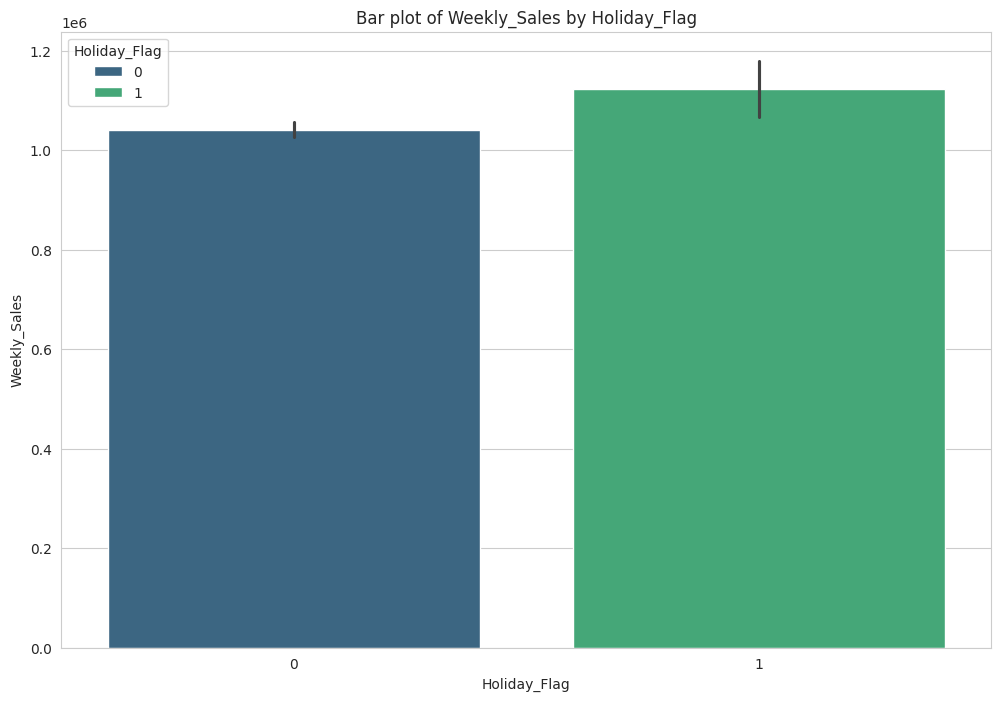

In [15]:
plot_bar(df,'Holiday_Flag','Weekly_Sales')

In [16]:
print(data_new.groupby('Holiday_Flag').agg(['count','sum','mean']))

             Weekly_Sales                              
                    count              sum         mean
Holiday_Flag                                           
0                    5985 6,231,919,435.55 1,041,256.38
1                     450   505,299,551.56 1,122,887.89


*   The data suggests that weeks with holidays tend to have slightly higher average weekly sales compared to weeks without holidays.
*   While holiday weeks have a higher average sales value, the majority of sales still occur during non-holiday weeks



In [17]:
data_new = df[['Weekly_Sales', 'Temperature']]
temperature_ranges = ['0-20','20-40','40-60','60-80','80-100','100-120']
data_new.loc[:,'Temperature'] = pd.cut(data_new['Temperature'], bins=[0,20,40,60,80,100,120],labels = temperature_ranges )
pd.set_option('display.float_format', '{:.2f}'.format)



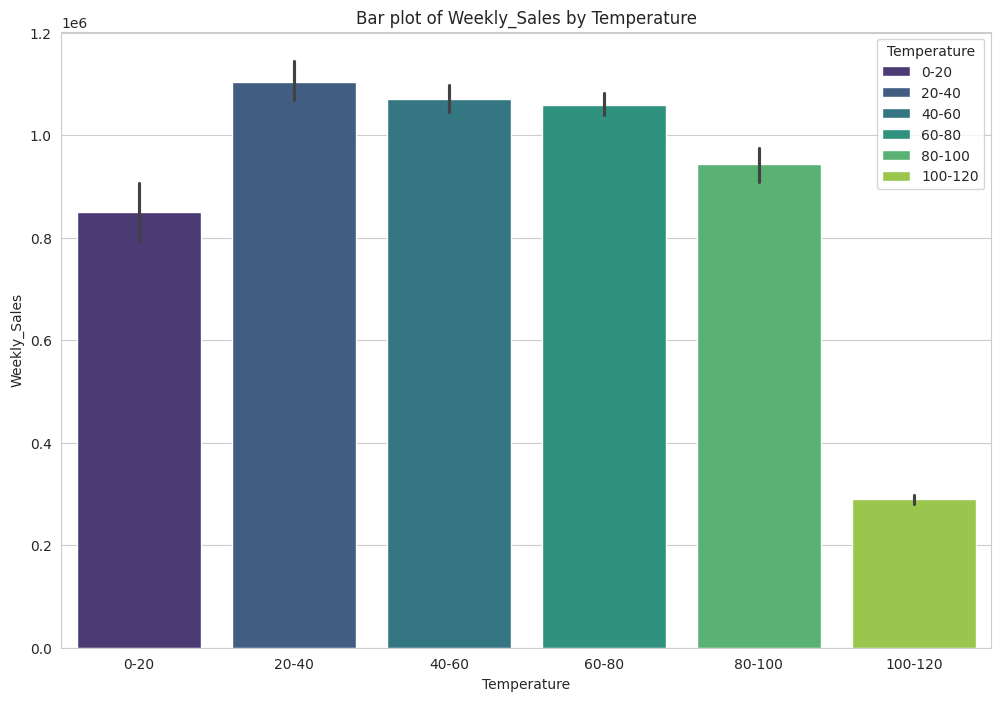

In [18]:
plot_bar(data = data_new, x = 'Temperature', y = 'Weekly_Sales' )

In [19]:
print(data_new.groupby('Temperature').agg(['count','sum','mean']))

            Weekly_Sales                         
                   count           sum       mean
Temperature                                      
0-20                  85   72183753.14  849220.63
20-40                903  996758537.35 1103830.05
40-60               1948 2086474338.26 1071085.39
60-80               2441 2585490578.72 1059193.19
80-100              1055  995175060.54  943293.90
100-120                2     578691.33  289345.67


* Weekly sales tend to increase as temperature rises, peaking in the 60-80°F range, then slightly declining in the 80-100°F range.
* The 40-60°F temperature range has the highest count of observations, suggesting it's a common temperature range during which sales are relatively strong.
* Extreme temperature ranges (below 20°F and above 100°F) have fewer observations and lower mean sales, indicating that sales might be impacted by adverse weather conditions.





In [20]:
data_new = df[['Weekly_Sales','Fuel_Price']]
fuel_ranges = bin_labels = ['2.0-2.5', '2.5-3.0', '3.0-3.5', '3.5-4.0', '4.0-4.5'] # bins labelling edges
data_new.loc[:,'Fuel_Price'] = pd.cut(data_new['Fuel_Price'],bins = [2.0, 2.5, 3.0, 3.5, 4.0, 4.5], labels = fuel_ranges)

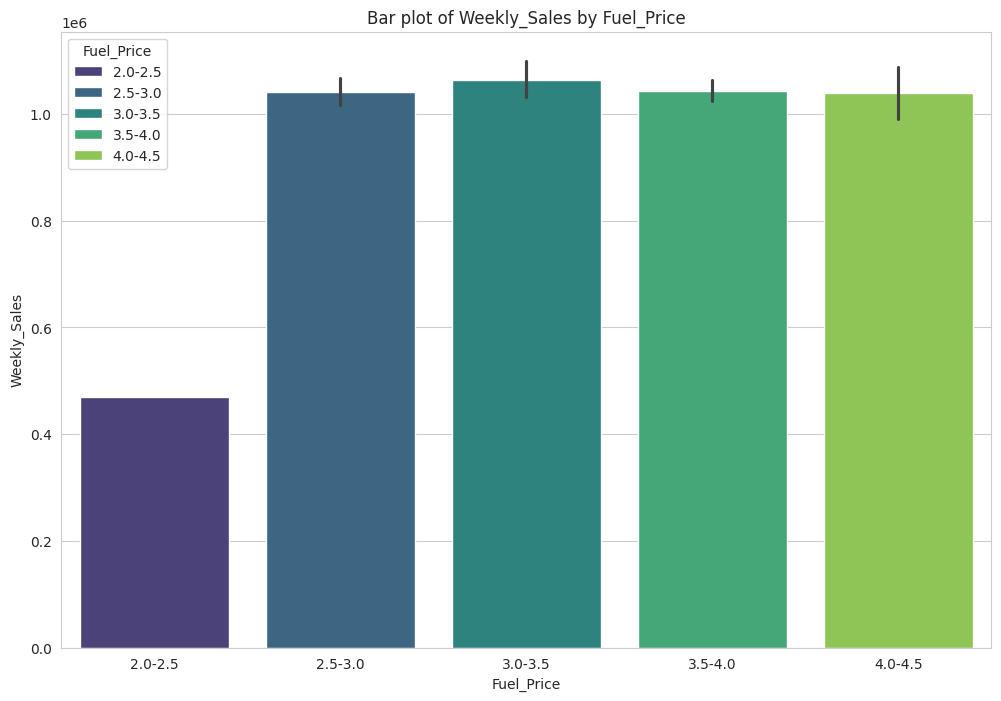

In [21]:
plot_bar(data_new, x = 'Fuel_Price', y = 'Weekly_Sales')

In [22]:
print(data_new.groupby('Fuel_Price').agg(['count','sum','mean']))

           Weekly_Sales                         
                  count           sum       mean
Fuel_Price                                      
2.0-2.5               1     470281.03  470281.03
2.5-3.0            1872 1948480005.15 1040854.70
3.0-3.5            1533 1629321409.80 1062831.97
3.5-4.0            2625 2739146372.89 1043484.33
4.0-4.5             404  419800918.24 1039111.18


* The majority of observations fall within the fuel price range of 3.0-4.0, indicating that prices within this range are common across the dataset.
* Despite the limited number of observations, the fuel price range of 2.5-3.0 shows the highest total sales, suggesting that moderate fuel prices may be conducive to higher sales.
* While there is a slight decrease in mean sales as fuel prices increase from 2.5-4.5, the difference is not substantial, indicating that sales are relatively stable across different fuel price ranges.

In [23]:
data_new = df[['Weekly_Sales','CPI']]
min_value = data_new['CPI'].min()
max_value = data_new['CPI'].max()

num_bins = 3
bin_width = (max_value - min_value) / num_bins

bin_edges = np.linspace(min_value, max_value, num=num_bins+1)


bin_edges = np.round(bin_edges, 2)

bin_labels = [f'{bin_edges[i]}-{bin_edges[i+1]}' for i in range(len(bin_edges)-1)]

data_new.loc[:,'CPI'] = pd.cut(data_new['CPI'],bin_edges, bin_labels )


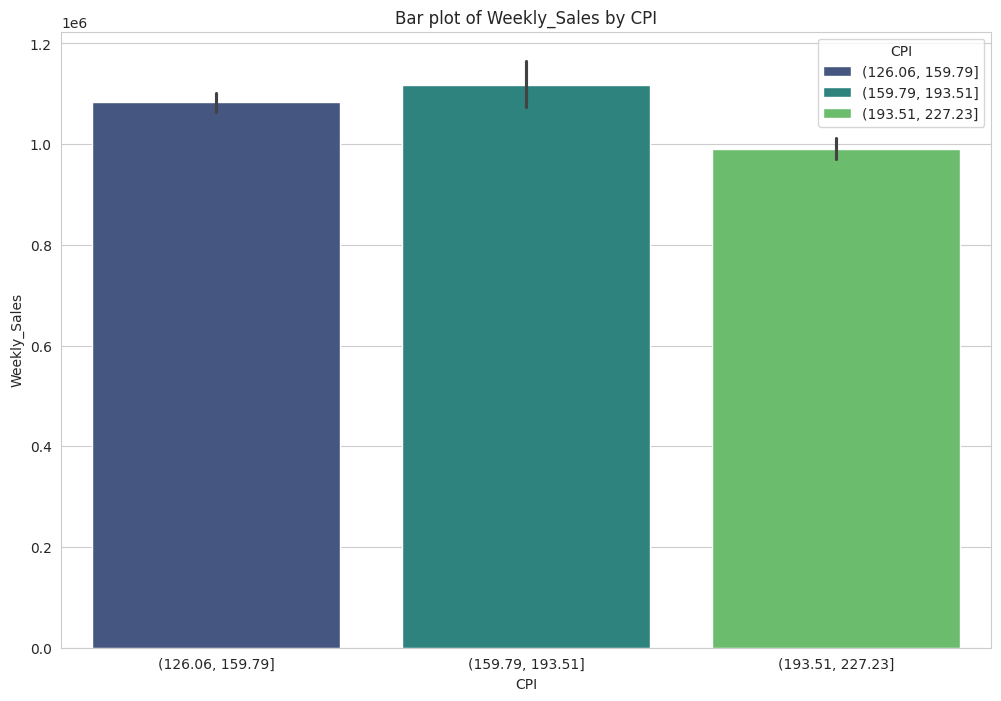

In [24]:
plot_bar(data_new, x = 'CPI', y = 'Weekly_Sales')

In [25]:
print(data_new.groupby('CPI').agg(['count','sum','mean']))

                 Weekly_Sales                         
                        count           sum       mean
CPI                                                   
(126.06, 159.79]         3146 3406971287.06 1082953.37
(159.79, 193.51]          590  658799683.12 1116609.63
(193.51, 227.23]         2698 2670898285.44  989954.89


* The majority of observations fall within the CPI range of 126.06-159.79, indicating that most stores operate in regions with relatively lower customer price indices.
* Despite fewer observations, the CPI range of 159.79-193.51 shows the highest mean sales, suggesting that stores in regions with moderately higher customer price indices tend to have higher average sales.
* Stores in regions with CPIs above 193.51 exhibit lower mean sales compared to other ranges, indicating that exceptionally high customer price indices may have a negative impact on sales performance.
* Overall, there is a positive association between CPI and sales, with stores in regions with moderate customer price indices demonstrating the highest sales performance on average

In [26]:
data_new = df[['Weekly_Sales','Unemployment']]
min_value = data_new['Unemployment'].min()
max_value = data_new['Unemployment'].max()

num_bins = 5
bin_width = (max_value - min_value) / num_bins

bin_edges = np.linspace(min_value, max_value, num=num_bins+1)


bin_edges = np.round(bin_edges, 2)


bin_labels = [f'{bin_edges[i]}-{bin_edges[i+1]}' for i in range(len(bin_edges)-1)]

data_new.loc[:,'Unemployment'] = pd.cut(data_new['Unemployment'],bin_edges, bin_labels )


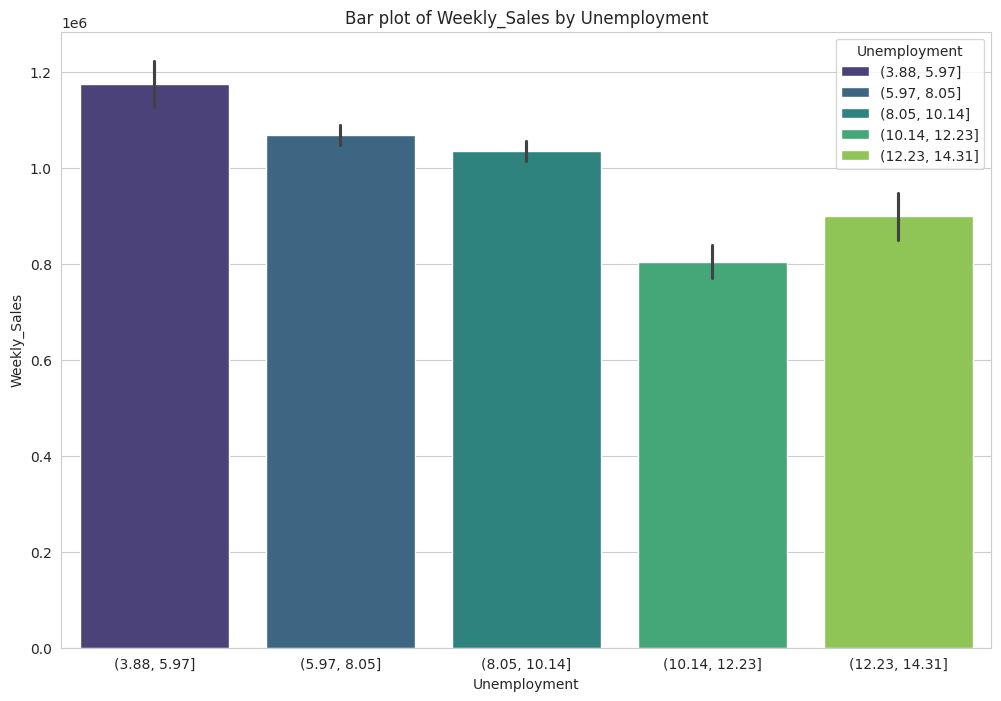

In [27]:
plot_bar(data_new, x = 'Unemployment', y = 'Weekly_Sales')

In [28]:
print(data_new.groupby('Unemployment').agg(['count','sum','mean']))

               Weekly_Sales                         
                      count           sum       mean
Unemployment                                        
(3.88, 5.97]            618  725745400.14 1174345.31
(5.97, 8.05]           2897 3096659103.60 1068919.26
(8.05, 10.14]          2303 2383182897.43 1034816.72
(10.14, 12.23]          313  251626152.22  803917.42
(12.23, 14.31]          258  232106789.54  899638.72


* The majority of observations fall within the Unemployment rate range of 5.97-8.05, indicating that most stores operate in regions with moderate unemployment rates.
* Despite having fewer observations, the Unemployment rate range of 3.88-5.97 exhibits the highest mean sales, suggesting that stores in regions with relatively lower unemployment rates tend to have higher average sales.
* Stores in regions with Unemployment rates above 10.14 demonstrate lower mean sales compared to other ranges, indicating that higher unemployment rates may negatively impact sales performance.
* Overall, there appears to be an inverse relationship between Unemployment rate and sales, with stores in regions with moderate unemployment rates showing the highest sales performance on average.

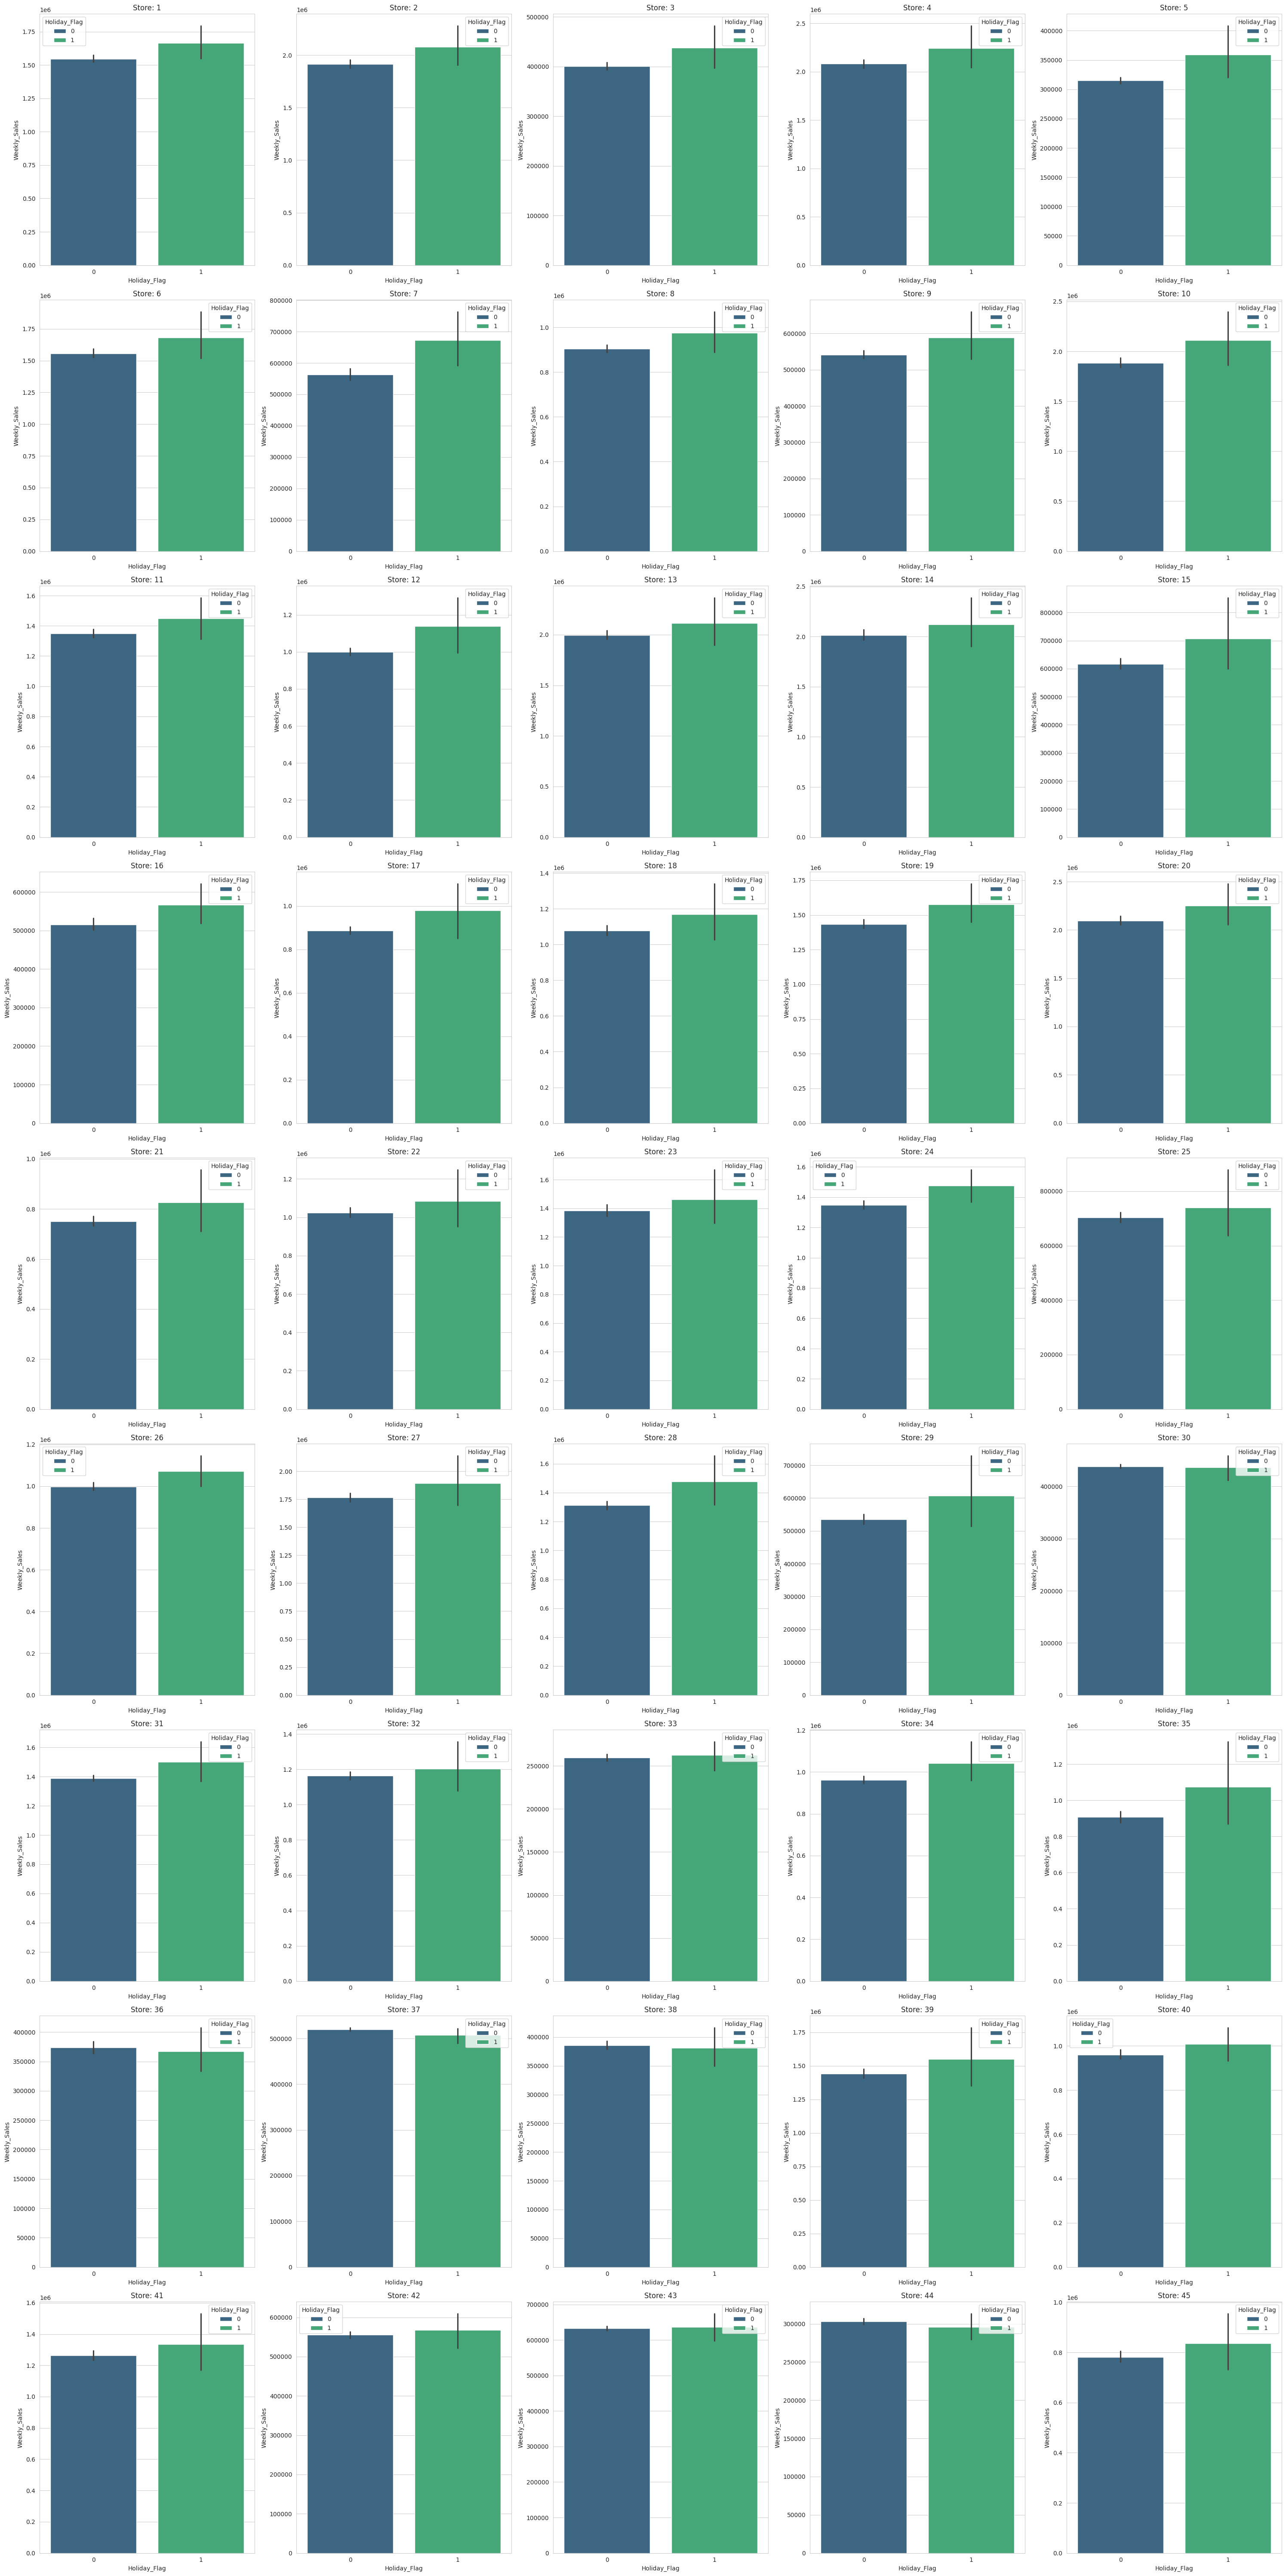

In [29]:
n_rows = 9
n_cols = 5
fig, axes = plt.subplots(n_rows, n_cols, figsize=(30, 60))

# Flatten axes for easy access
axes = axes.flatten()

for i, ax in enumerate(axes, 1):
    sns.barplot(data=df[df['Store'] == i], x='Holiday_Flag', y='Weekly_Sales', palette='viridis', hue='Holiday_Flag', ax=ax)
    ax.set_xlabel('Holiday_Flag')
    ax.set_ylabel('Weekly_Sales')
    ax.set_title(f'Store: {i}')


plt.tight_layout()
plt.show()


* Holidays significantly impact sales across all stores, with sales showing a notable increase during holiday weeks compared to non-holiday weeks.
* On average, sales tend to rise during holiday periods, suggesting that customers are more inclined to make purchases during these times.
* To capitalize on sales opportunities during non-holiday periods, stores could consider implementing strategies such as offering discounts, promotions, or special deals on weekdays to attract customers and stimulate sales outside of holiday seasons.

In [30]:
df['Date'] = pd.to_datetime(df['Date'], format = "%d-%m-%Y") #Converting to datetime

In [31]:
df_numeric = df.select_dtypes(include = ['int','float'])

In [32]:
correlation_matrix = df_numeric.corr()

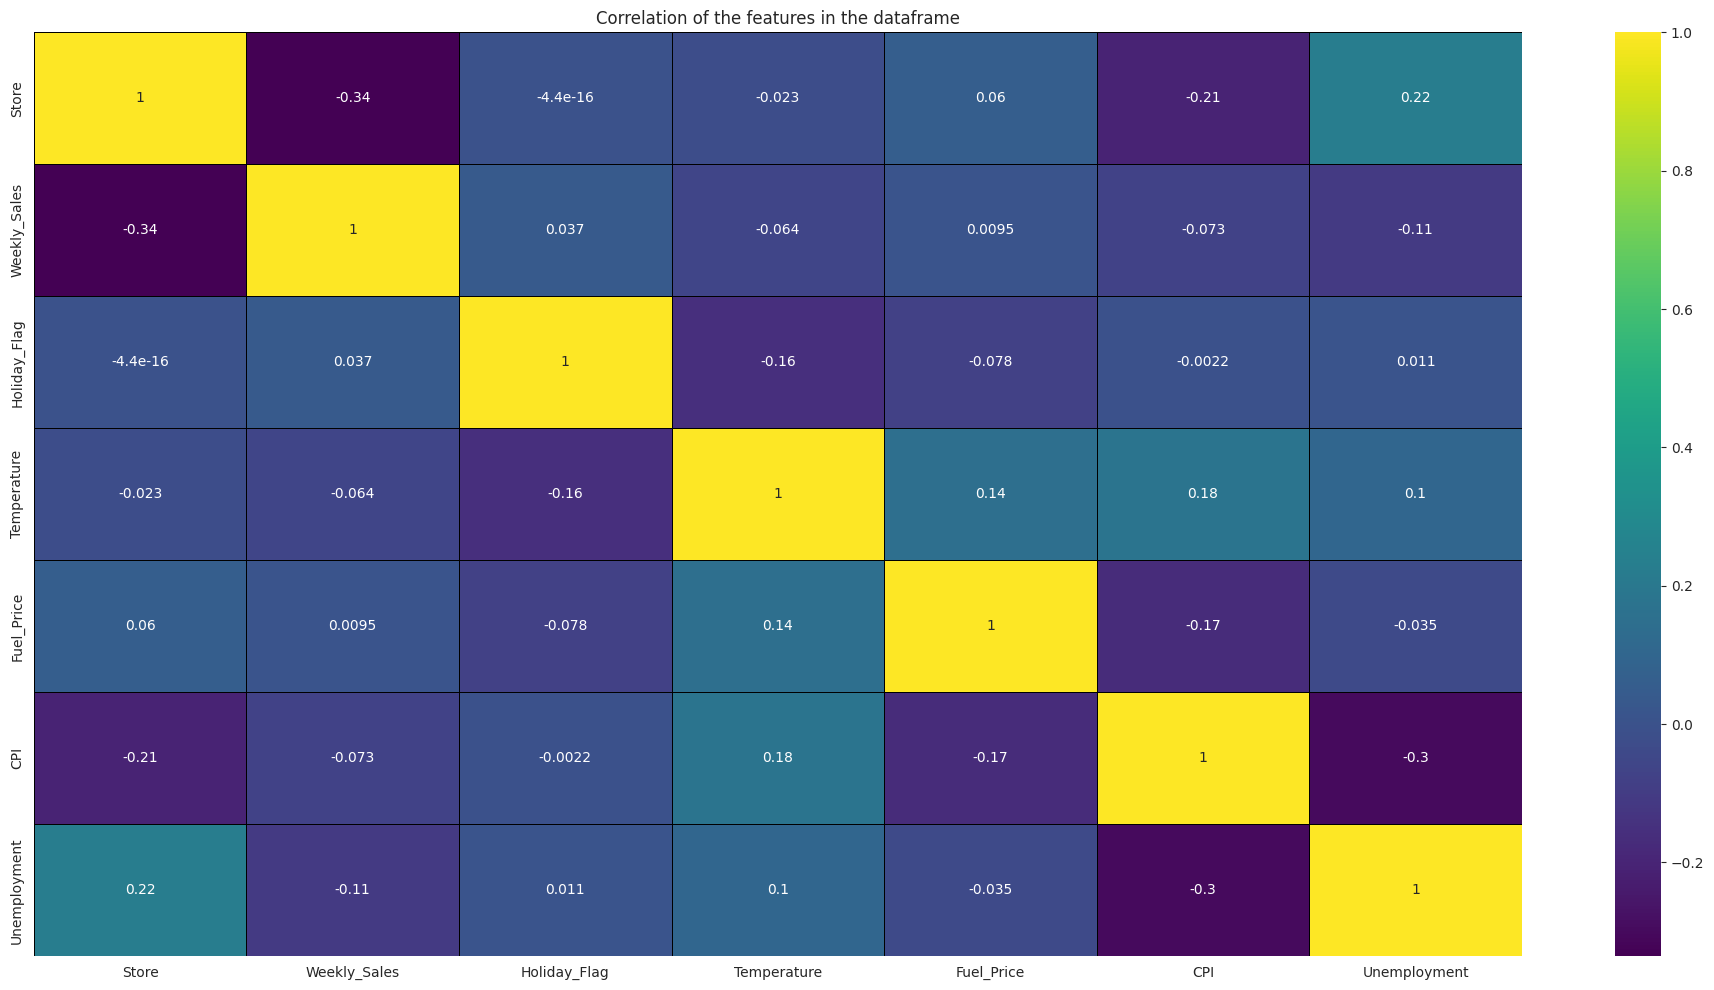

In [33]:
plt.figure(figsize= (24, 12))

sns.heatmap(correlation_matrix, annot = True, cmap = 'viridis', linewidths= 0.5, linecolor= 'black', cbar = True )

plt.title("Correlation of the features in the dataframe")

plt.show()

In [34]:
corr_temperature = df['Temperature'].corr(df['Weekly_Sales'])

In [35]:
corr_temperature

-0.06381001317946955

In [36]:
from scipy.stats import pearsonr

# Understanding correlation of sales by temperature

corr, p_value = pearsonr(df['Weekly_Sales'], df['Temperature'])

print('correlation_temperature:',corr)

print('p_value_temperature:',p_value )

correlation_temperature: -0.06381001317946956
p_value_temperature: 3.007647625833226e-07


* The correlation coefficient between weekly sales and temperature is approximately -0.064, indicating a weak negative correlation. This suggests that there is a slight tendency for sales to decrease slightly as temperature rises, although the correlation is not strong.
* The p-value associated with the correlation test is very low (approximately 3.01e-07), indicating that the observed correlation is statistically significant. This suggests that the relationship between weekly sales and temperature is unlikely to be due to random chance.
* Despite the statistically significant correlation, the magnitude of the correlation coefficient is quite small, suggesting that temperature alone may not be a strong predictor of weekly sales. Other factors such as promotions, store location, and consumer behavior may have a more significant impact on sales.
* To capitalize on sales regardless of temperature fluctuations, stores could implement versatile marketing strategies such as targeted promotions, loyalty programs, and seasonal sales events. Additionally, offering a diverse range of products and optimizing store layouts to enhance the shopping experience could attract customers irrespective of weather conditions.

In [37]:
corr_temperature = df['CPI'].corr(df['Weekly_Sales'])

In [38]:
corr, p_value = pearsonr(df['CPI'], df['Weekly_Sales'])

# Understanding correlation of sales by Customer Priced Index

print('correlation_CPI:',corr)

print('p_value_CPI:',p_value )

correlation_CPI: -0.07263416204017623
p_value_CPI: 5.438292612176735e-09


* Weekly sales show a weak negative correlation (-0.073) with the Customer Price Index (CPI).
* The correlation is statistically significant (p < 0.001), indicating a genuine relationship.
* While CPI alone may not strongly predict sales, adjusting pricing strategies in response to CPI fluctuations could help maintain sales levels.
* To leverage insights from the correlation between sales and the CPI, stores could adjust their pricing strategies in response to changes in the CPI. For example, during periods of high CPI, offering discounts or promotions could help attract price-sensitive customers and maintain sales levels. Additionally, monitoring CPI trends and adapting inventory levels or product offerings accordingly can help stores stay competitive in fluctuating economic environments.

In [39]:
corr, p_value = pearsonr(df['Unemployment'], df['Weekly_Sales'])

print('correlation_unemployemnt:',corr)

print('p_value_unemployment:',p_value )

correlation_unemployemnt: -0.10617608965795423
p_value_unemployment: 1.3448365210234661e-17


* There exists a moderate negative correlation (-0.106) between weekly sales and unemployment rates.
* The correlation is highly significant (p < 0.001), indicating a robust relationship.
* Stores could consider targeted marketing campaigns or promotional events during periods of low unemployment to capitalize on increased consumer spending confidence.

In [40]:
corr, p_value = pearsonr(df['Fuel_Price'], df['Weekly_Sales'])

print('correlation_fuel:',corr)

print('p_value_fuel:',p_value )

correlation_fuel: 0.009463786314475135
p_value_fuel: 0.44782874894858093


* There is a weak positive correlation (0.00946) between weekly sales and fuel prices.
* The correlation is not statistically significant (p = 0.448), suggesting that the relationship is likely due to random chance.
* To capitalize on sales, stores may focus less on fuel price fluctuations as a direct driver of consumer behavior and instead emphasize other factors like product offerings, customer experience enhancements.

In [41]:
total_sales_by_store = df.groupby('Store')['Weekly_Sales'].sum()

In [42]:
top_performing_store = total_sales_by_store.idxmax()
top_performing_sales = total_sales_by_store.max()

In [99]:
print('Top performing store number is ', top_performing_store)
print('Sales recorded on the store is', top_performing_sales)

Top performing store number is  20
Sales recorded on the store is 301397792.46


In [43]:
worst_performing_store = total_sales_by_store.idxmin()
worst_performing_sales = total_sales_by_store.min()

In [44]:
print('Worst performing store number is ', worst_performing_store)
print('Sales recorded on the store is', worst_performing_sales)

Worst performing store number is  33
Sales recorded on the store is 37160221.96


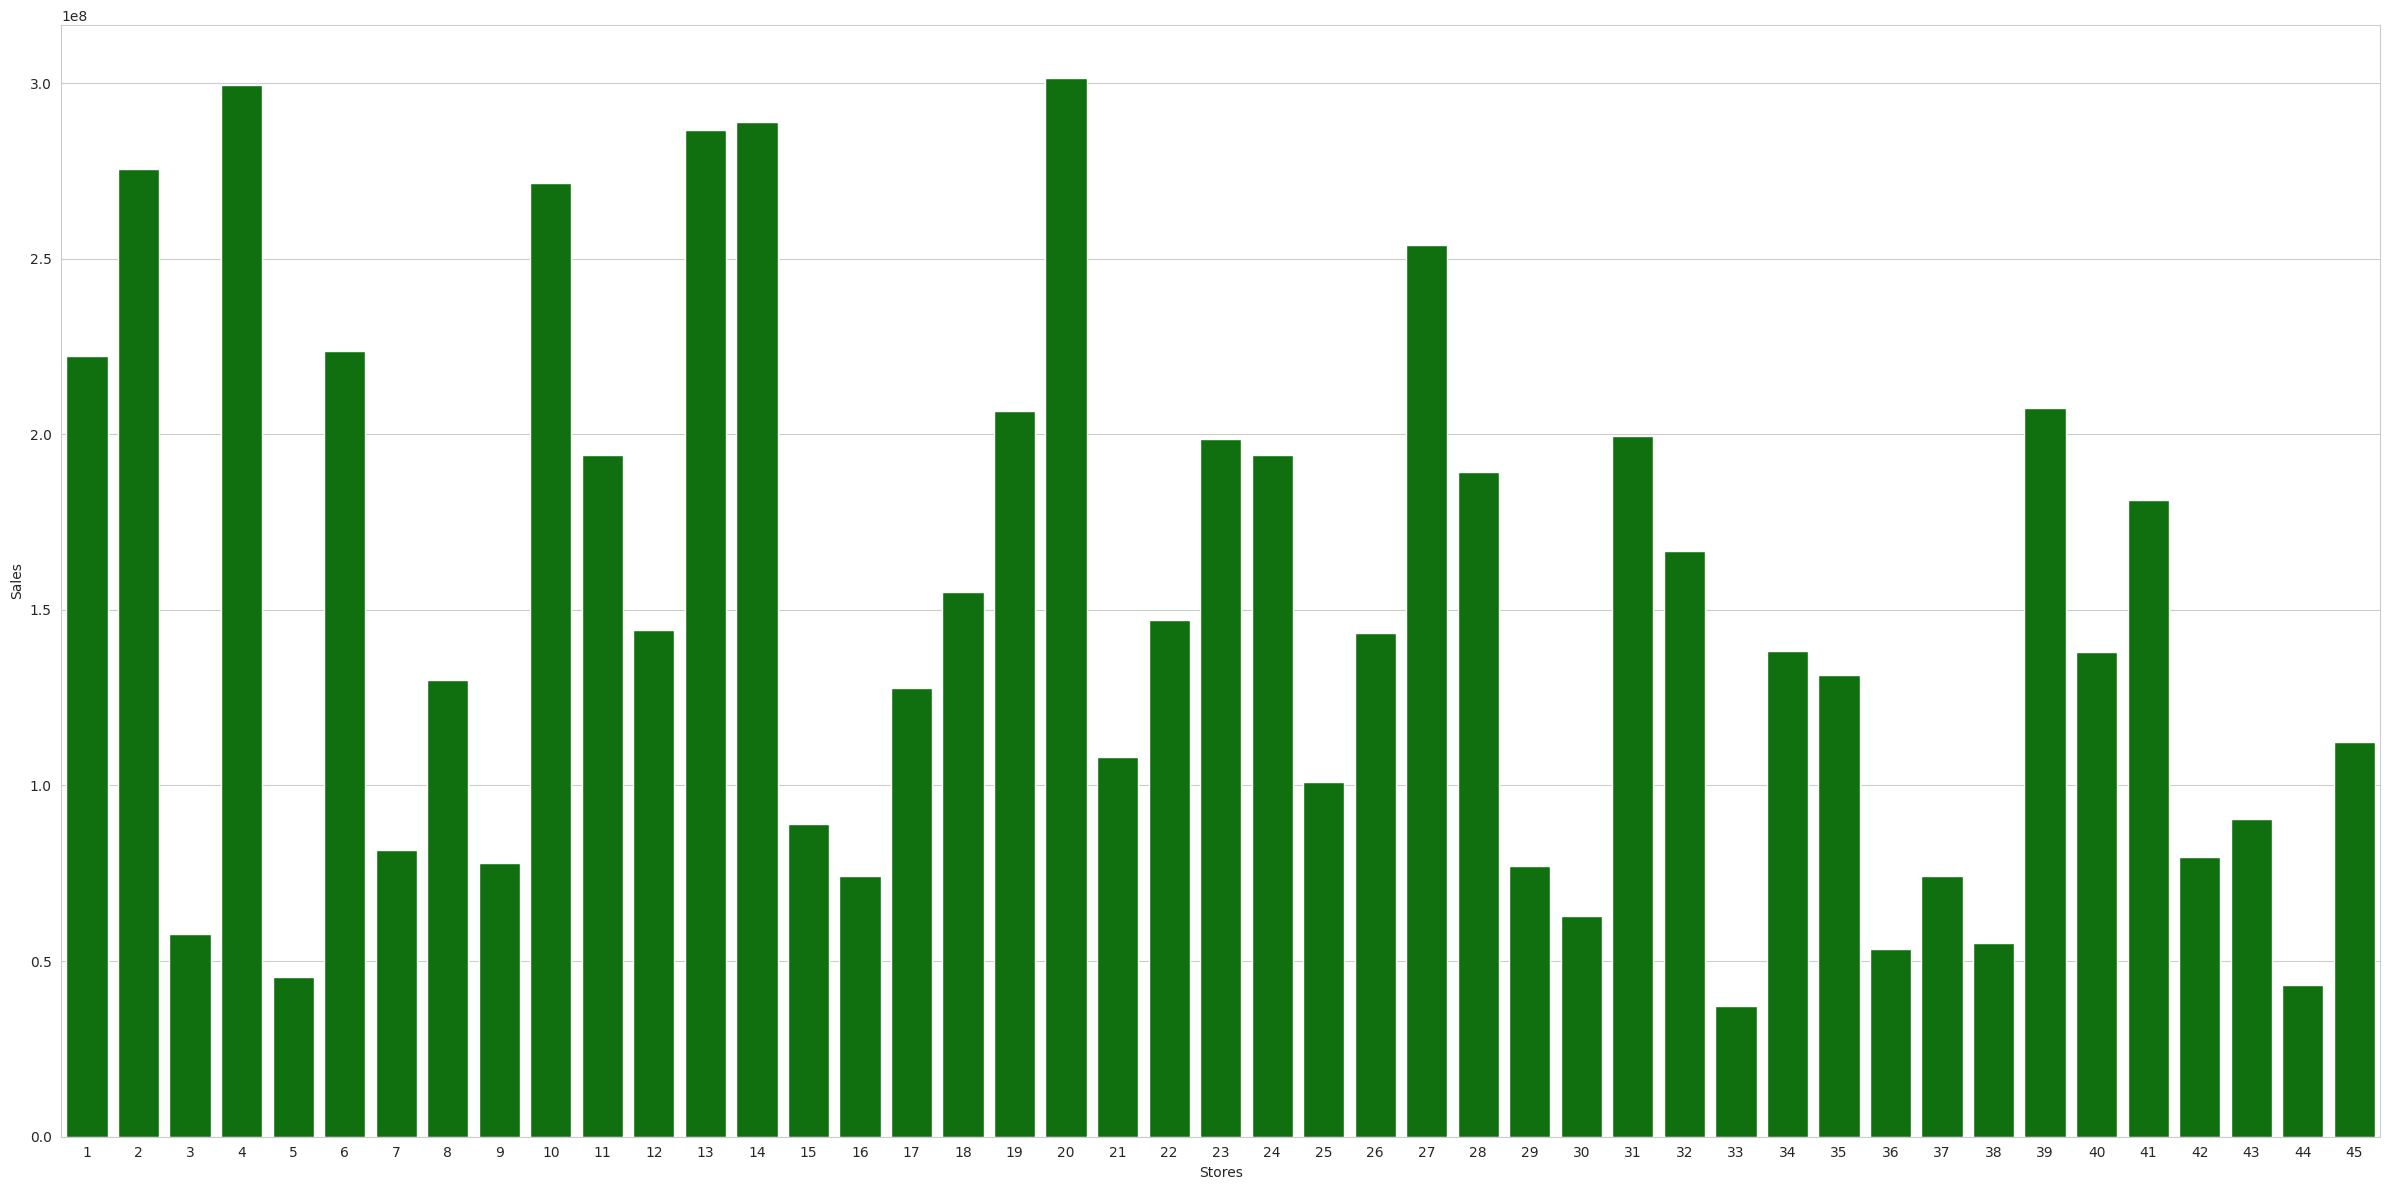

In [46]:
plt.figure(figsize=(24, 12))
sorted_total_sales_by_store = total_sales_by_store.sort_values(ascending=False)
sns.barplot(x=sorted_total_sales_by_store.index, y=sorted_total_sales_by_store, color='green')
sns.set_style('whitegrid')
plt.xlabel('Stores')
plt.ylabel('Sales')
plt.tight_layout()
plt.show()


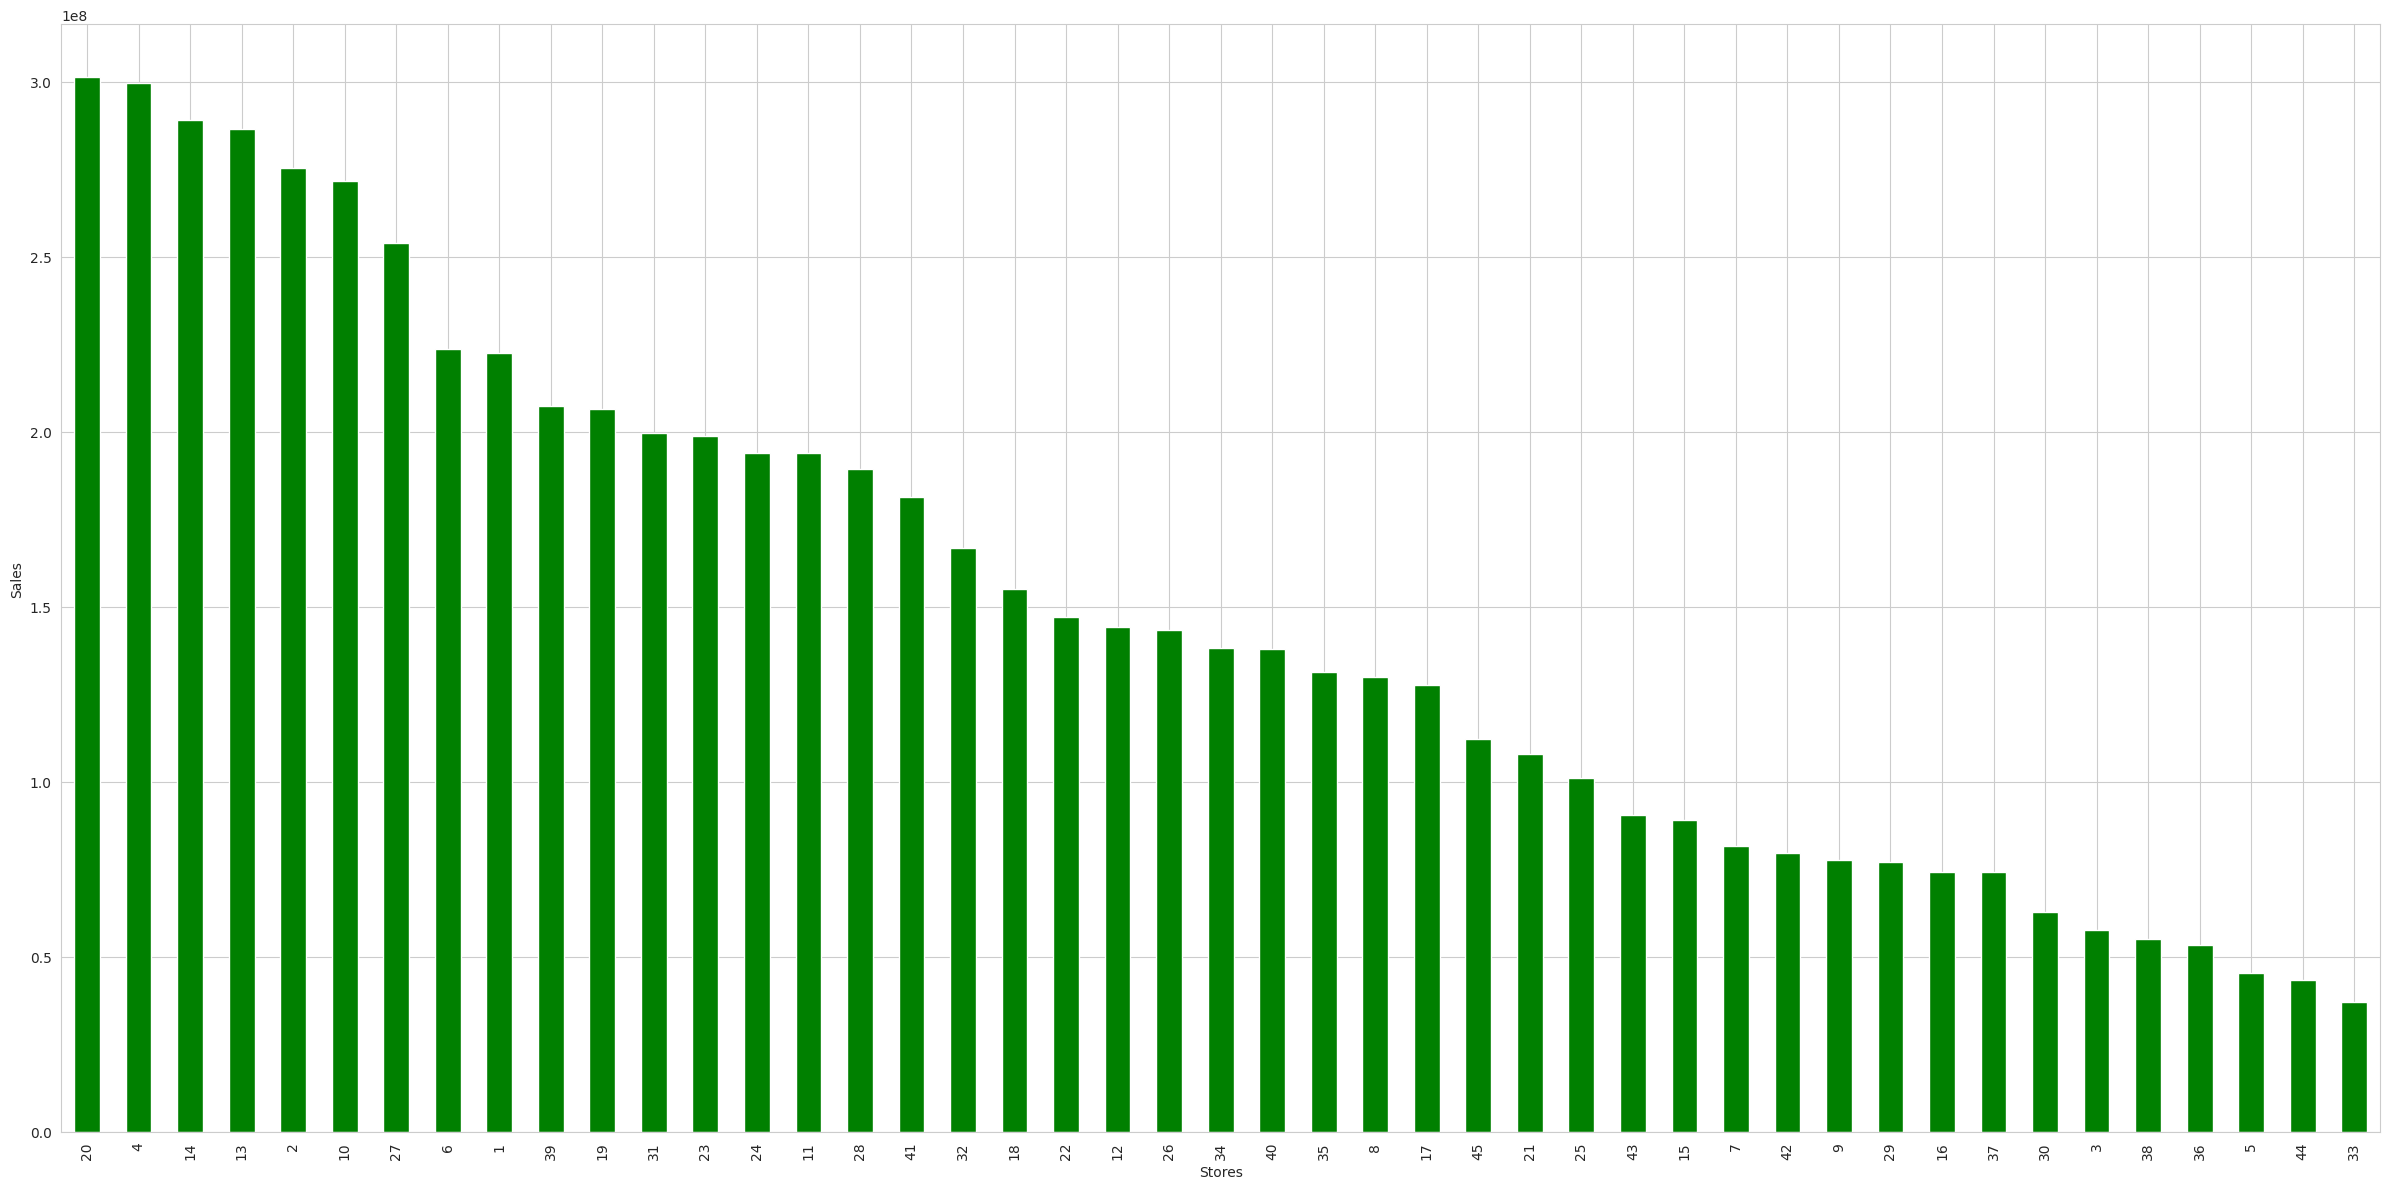

In [47]:
plt.figure(figsize=(24, 12))
sorted_total_sales_by_store.plot(kind = 'bar', color = 'green')
plt.xlabel('Stores')
plt.ylabel('Sales')
plt.tight_layout()
plt.show()

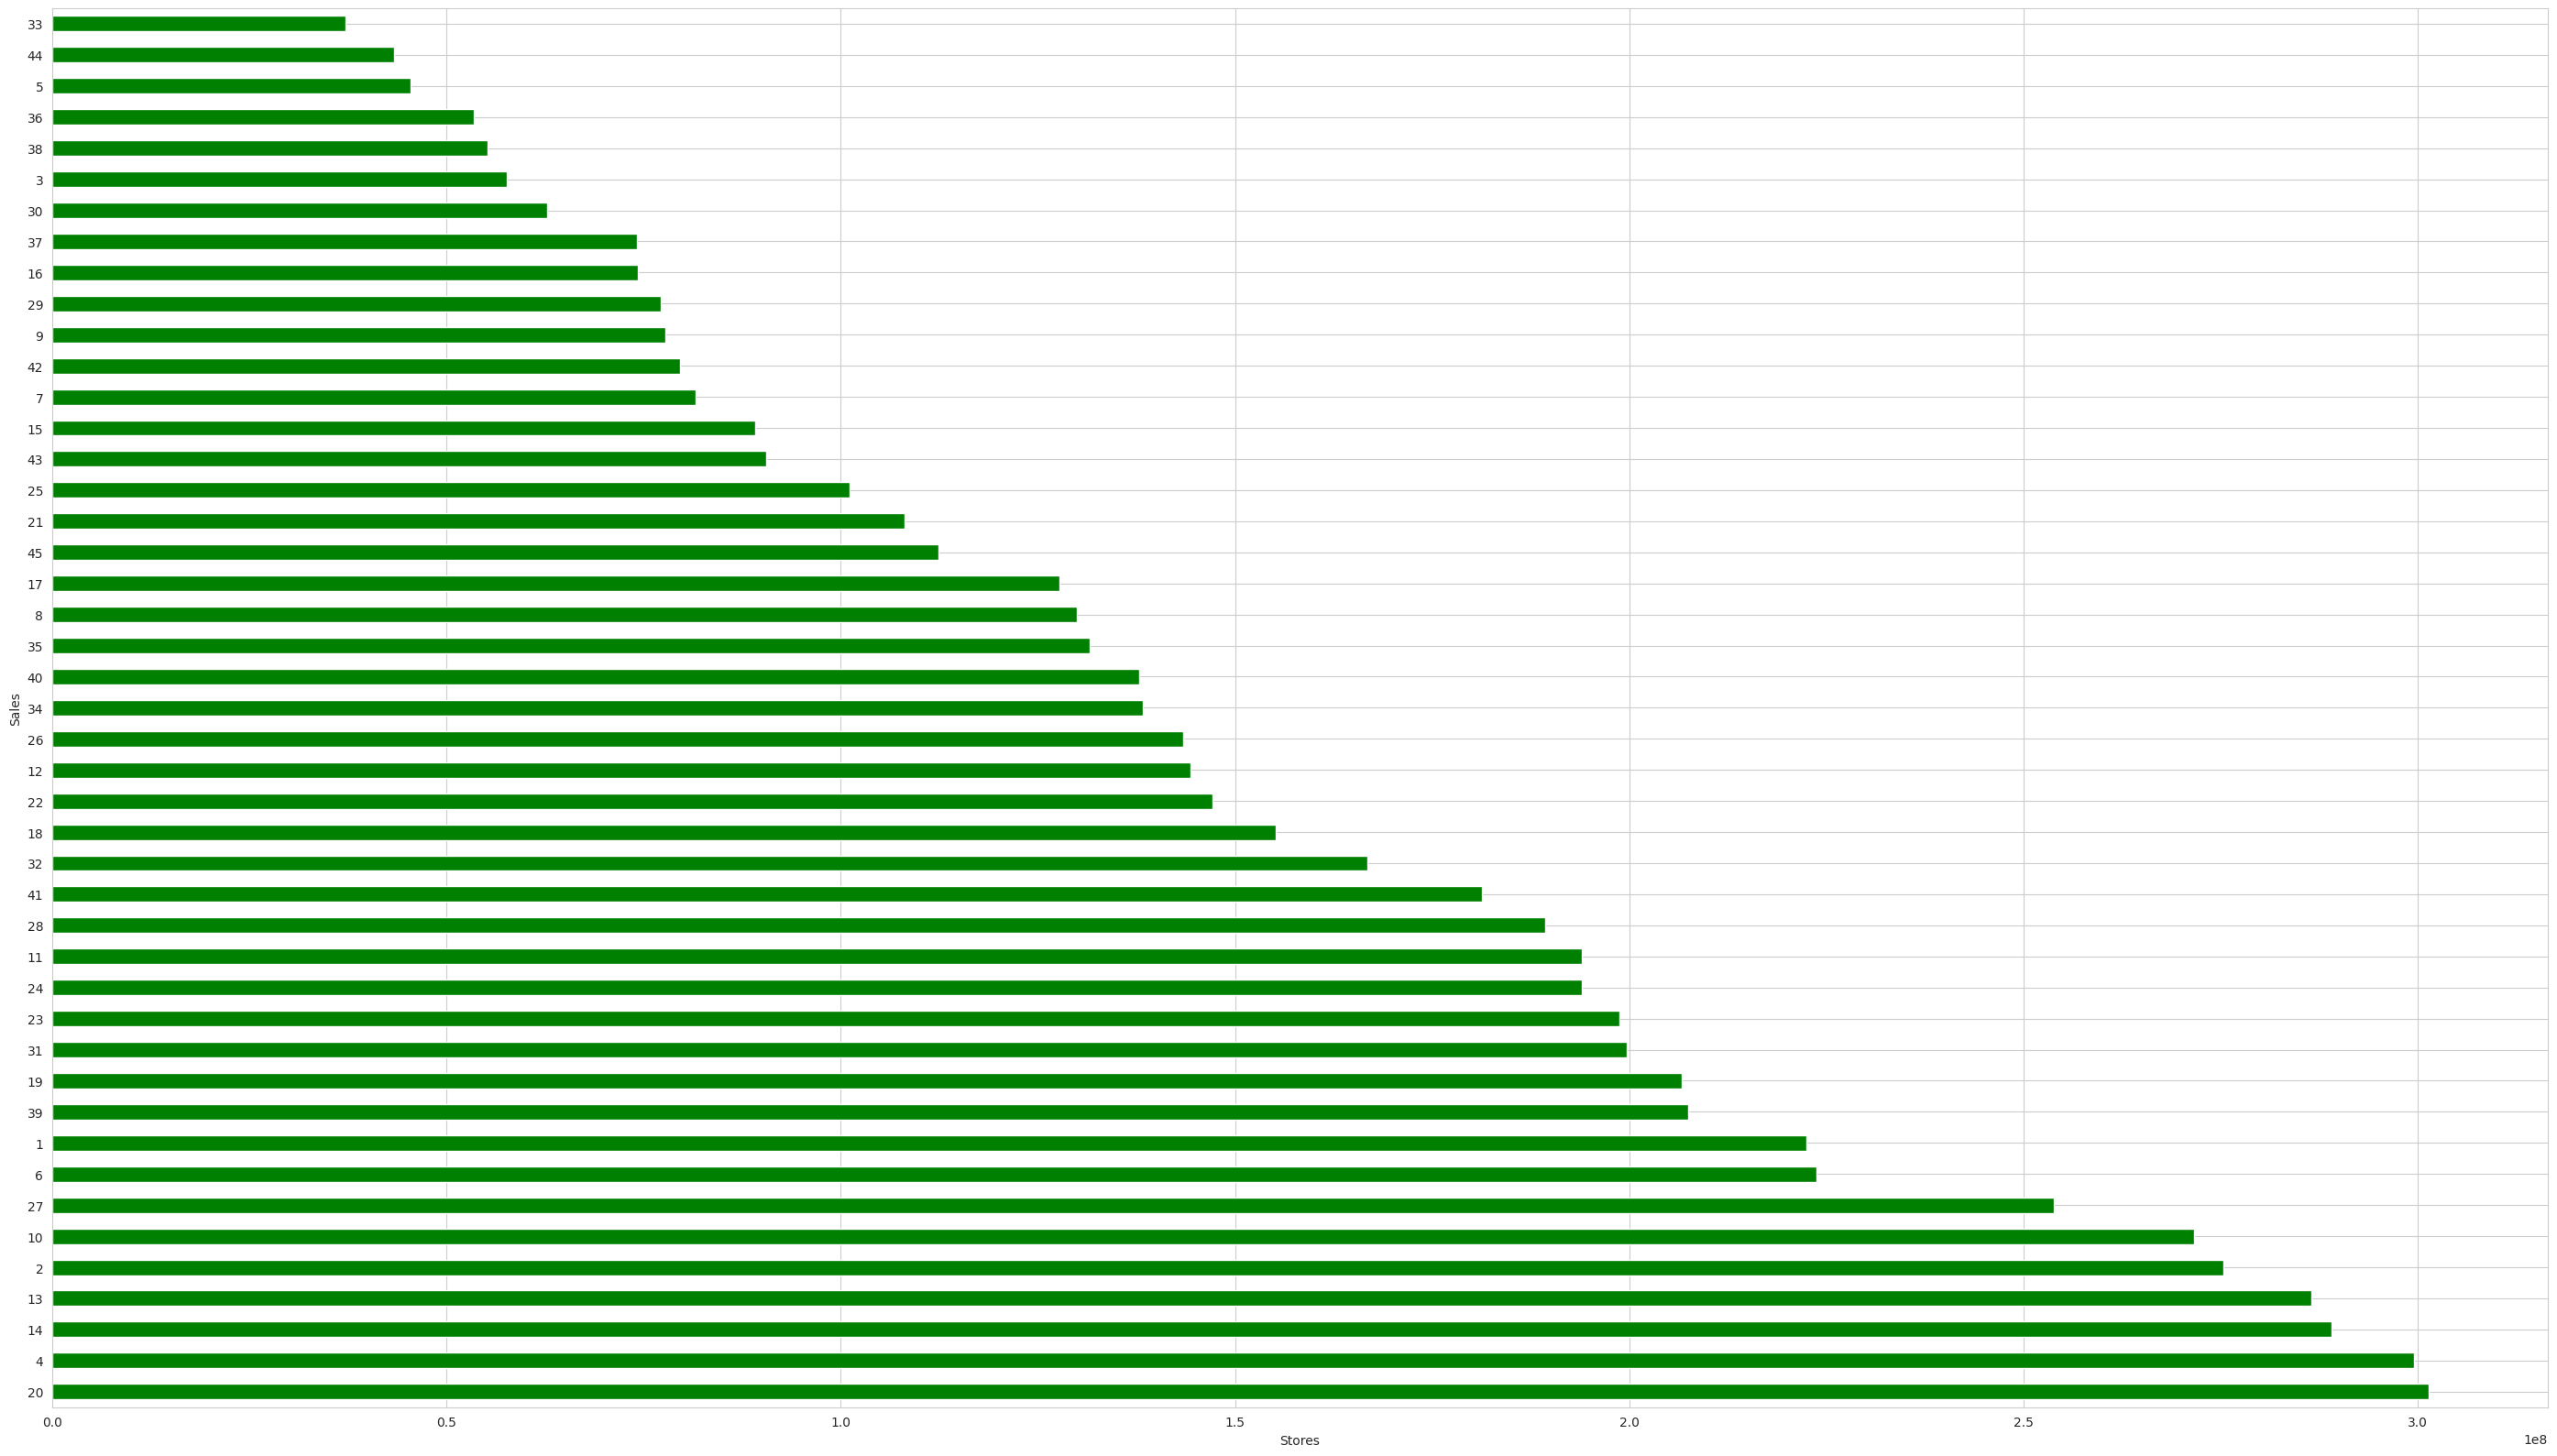

In [48]:
plt.figure(figsize=(28, 16))
sorted_total_sales_by_store.plot(kind = 'barh', color = 'green')
plt.xlabel('Stores')
plt.ylabel('Sales')
plt.tight_layout()
plt.show()

Based on the analysis, the insights which can be used by each of the stores to improve
* Seasonal Sales Promotions: Utilize holiday flags to plan and implement targeted sales promotions during peak shopping seasons, leveraging increased foot traffic and consumer spending patterns.

* Temperature-Dependent Product Assortment: Adjust product offerings based on temperature fluctuations to meet changing consumer preferences and demand for seasonal items, such as clothing, beverages, and outdoor equipment.


* Customer Price Index (CPI) Alignment: Align pricing strategies with changes in the Consumer Price Index to ensure competitive pricing while maintaining profit margins and customer satisfaction.

* Unemployment Rate Consideration: Tailor marketing campaigns and promotional activities to appeal to consumers affected by changes in the unemployment rate, such as offering value-oriented products or services and flexible payment options.

* Operational Efficiency Optimization: Streamline operational processes and optimize staffing levels to improve efficiency and reduce costs, ensuring smooth store operations and enhancing the overall customer experience.

* Inventory Management Enhancements: Implement advanced inventory management systems to optimize stock levels, reduce out-of-stock situations, minimize excess inventory, and improve overall inventory turnover rates.

* Customer Relationship Management (CRM): Implement CRM systems to collect and analyze customer data, enabling personalized marketing strategies, targeted promotions, and enhanced customer engagement and loyalty.

* Data-Driven Decision Making: Embrace data-driven decision-making processes by regularly analyzing sales data, customer feedback, and market trends to identify opportunities for improvement, optimize strategies, and drive informed business decisions.

* Performance monitoring: Establish key performance indicators (KPIs) to track poorly performing stores progress over time. Regularly review performance metrics and adjust strategies as needed to ensure continuous improvement and alignment with organizational goals

-----

#Question: 2 Forecast the sales for each store for the next 12 weeks.

___


In [49]:
df['Date'] = pd.to_datetime(df['Date'], format = "%d-%m-%Y") # Changing the date col to datatime format and setting as index

df.set_index('Date',inplace = True )



In [50]:
df.head() # check

Store  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price    CPI  \
Date                                                                            
2010-02-05      1    1643690.90             0        42.31        2.57 211.10   
2010-02-12      1    1641957.44             1        38.51        2.55 211.24   
2010-02-19      1    1611968.17             0        39.93        2.51 211.29   
2010-02-26      1    1409727.59             0        46.63        2.56 211.32   
2010-03-05      1    1554806.68             0        46.50        2.62 211.35   

            Unemployment  
Date                      
2010-02-05          8.11  
2010-02-12          8.11  
2010-02-19          8.11  
2010-02-26          8.11  
2010-03-05          8.11

In [51]:
store_ids = df['Store'].unique() # getting unique store ids

In [52]:
# Function to check for stationarity

def check_stationarity(timeseries):

  result = adfuller(timeseries)

  print('ADF Statistic :', result[0])
  print('p-value :', result[1])

  print('Critical_values')

  for key, value in result[4].items():
    print (f' {key} : {value}')

    if result[1] <= 0.05:
      print('Time series data is Stationary, we reject null hypothesis')
    else:
      print('Time series data is Non- Stationary, no evidence against null hypothesis')

In [53]:
weekly_sales = df['Weekly_Sales'] # getting data of weekly sales

print('Checking Stationarity of overall weekly sales data')

check_stationarity(weekly_sales)

Checking Stationarity of overall weekly sales data
ADF Statistic : -4.624149498578306
p-value : 0.00011655869699901148
Critical_values
 1% : -3.4313721757424656
Time series data is Stationary, we reject null hypothesis
 5% : -2.8619917128968813
Time series data is Stationary, we reject null hypothesis
 10% : -2.5670104435791017
Time series data is Stationary, we reject null hypothesis


In [56]:
# Analysying the characteristics of time series data by trend , sesonal and residual
def decomposition_time_series(timeseries):
  decomposition = seasonal_decompose(timeseries, model = 'additive',period = 52)

  trend = decomposition.trend

  seasonal = decomposition.seasonal

  residual = decomposition.resid

  return trend, seasonal, residual



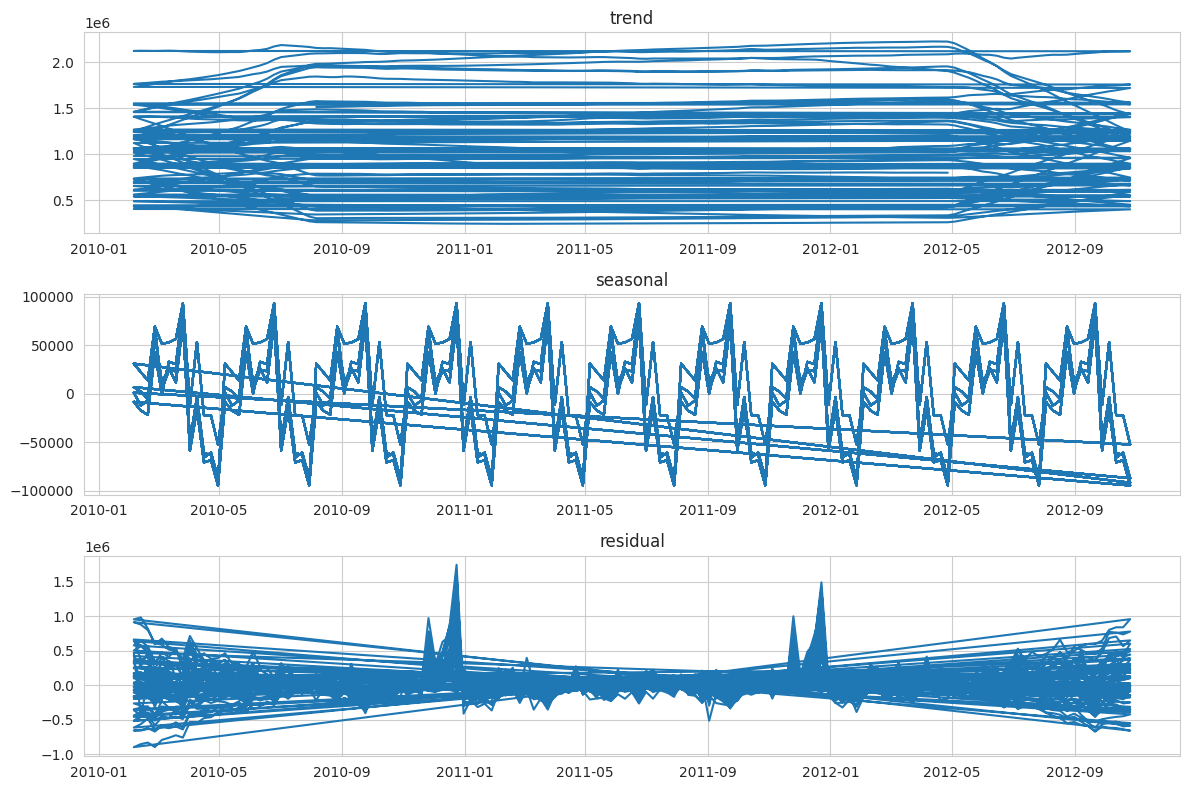

In [58]:
#calling the decompostion_time_series  function

trend, seasonal, residual = decomposition_time_series(df['Weekly_Sales'])

#Visulize the time_series_decompostion

plt.figure(figsize = (12,8))

#subplots 1 for trend

plt.subplot(3, 1, 1)
plt.plot(trend)
plt.title('trend')


#subplots 2 for seasonal

plt.subplot(3, 1, 2)
plt.plot(seasonal)
plt.title('seasonal')



#subplots 3 for residual
plt.subplot(3, 1, 3)
plt.plot(residual)
plt.title('residual')


plt.tight_layout()
plt.show()



/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)


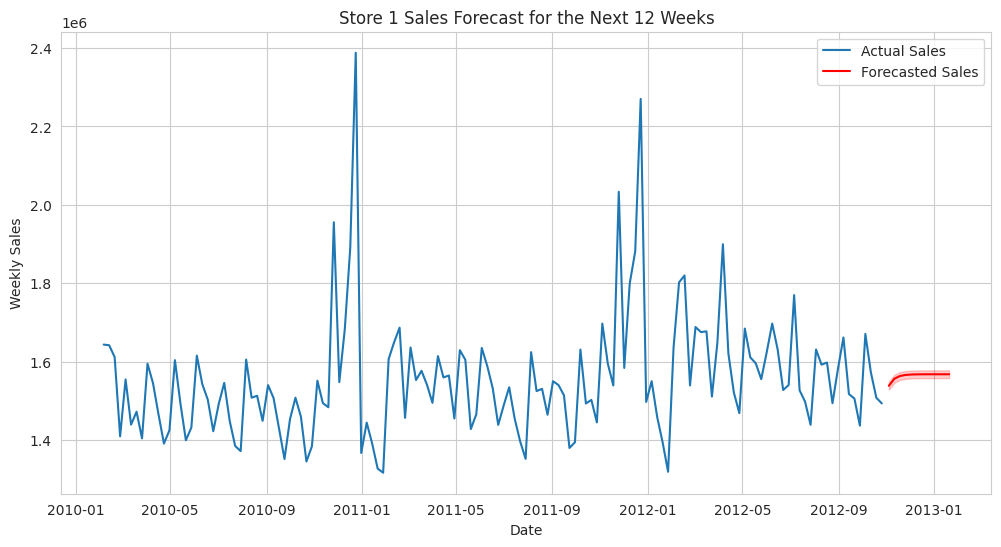

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)


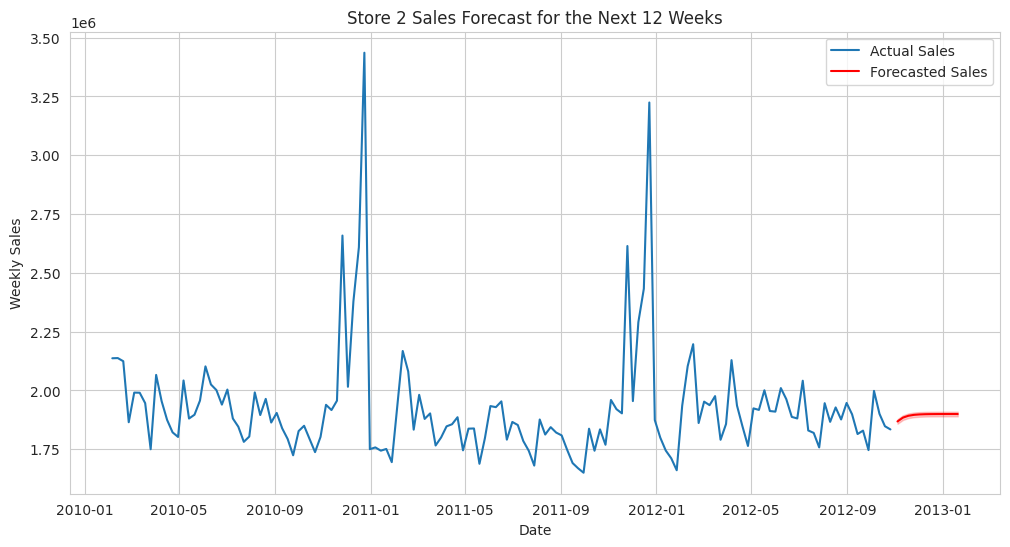

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)


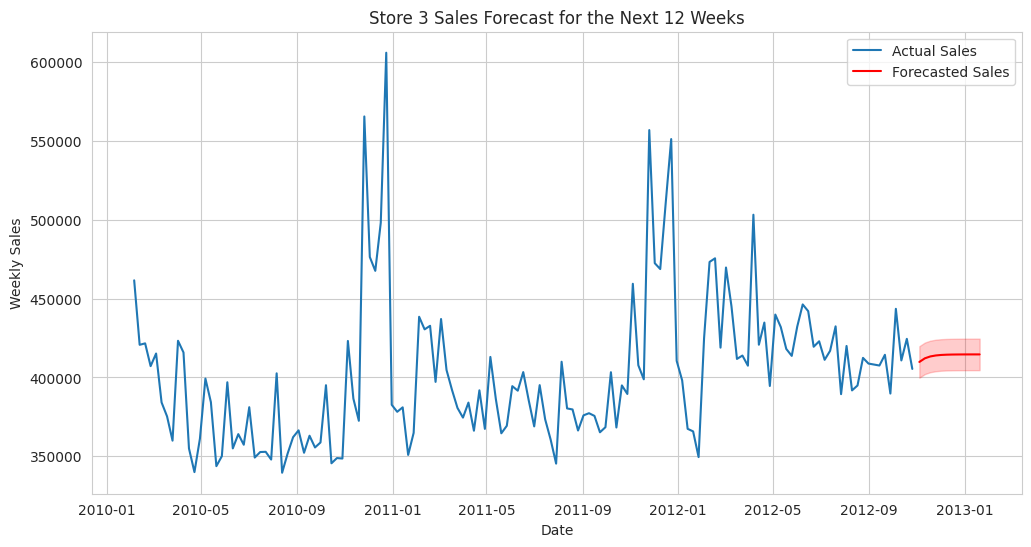

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)


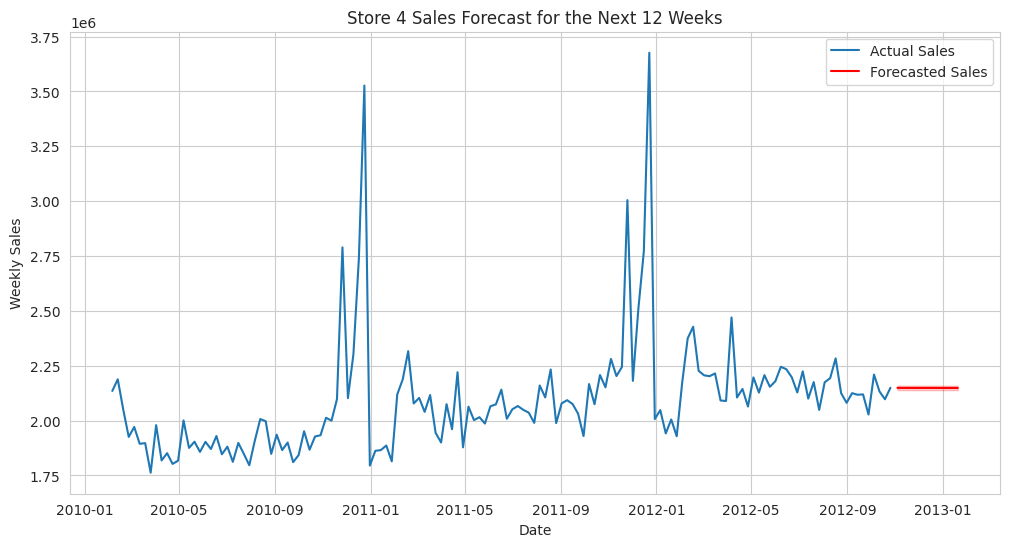

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)


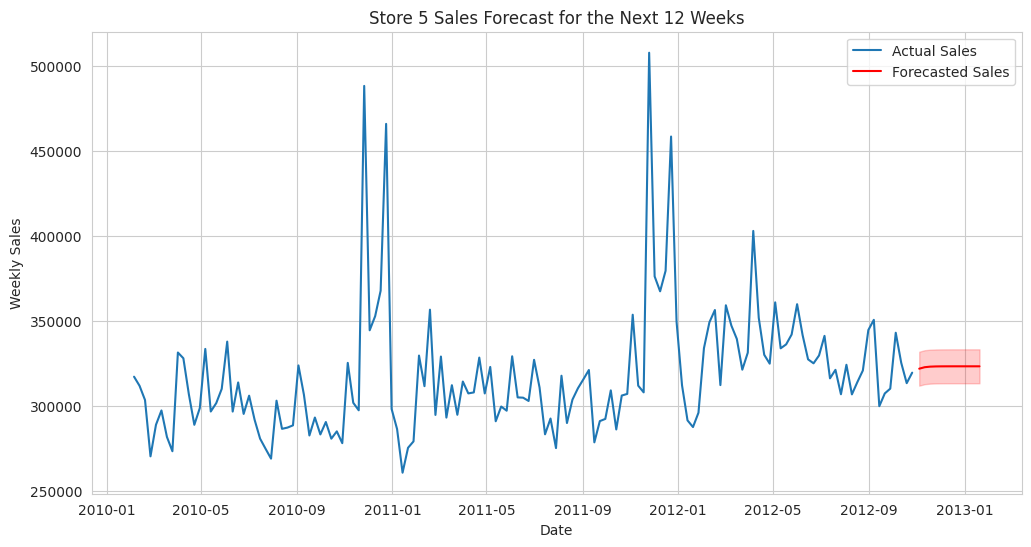

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)


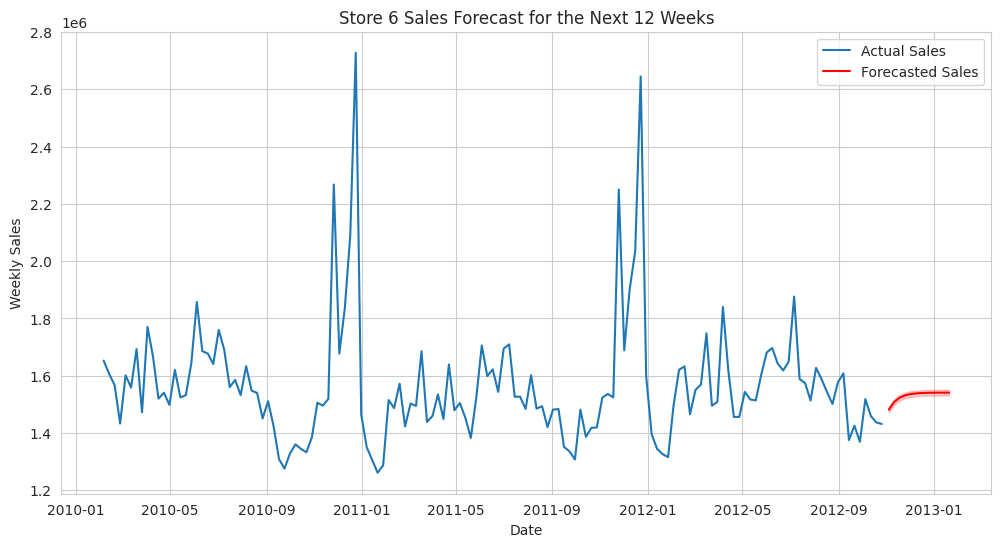

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)


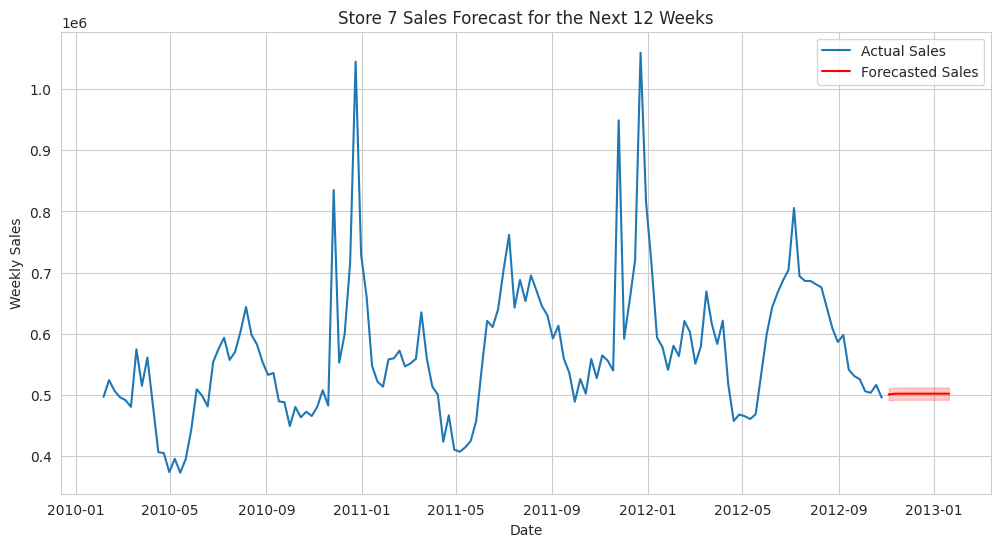

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)


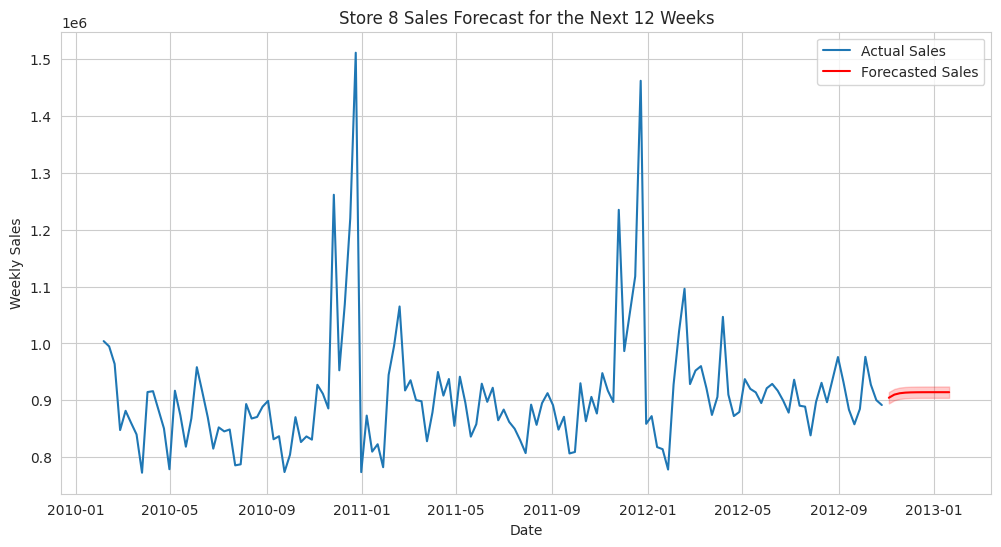

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)


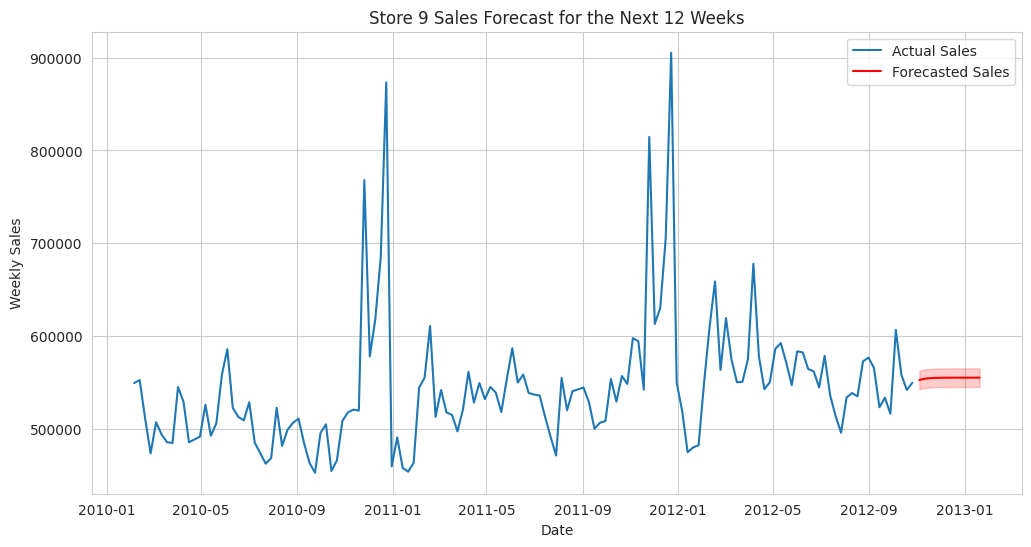

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)


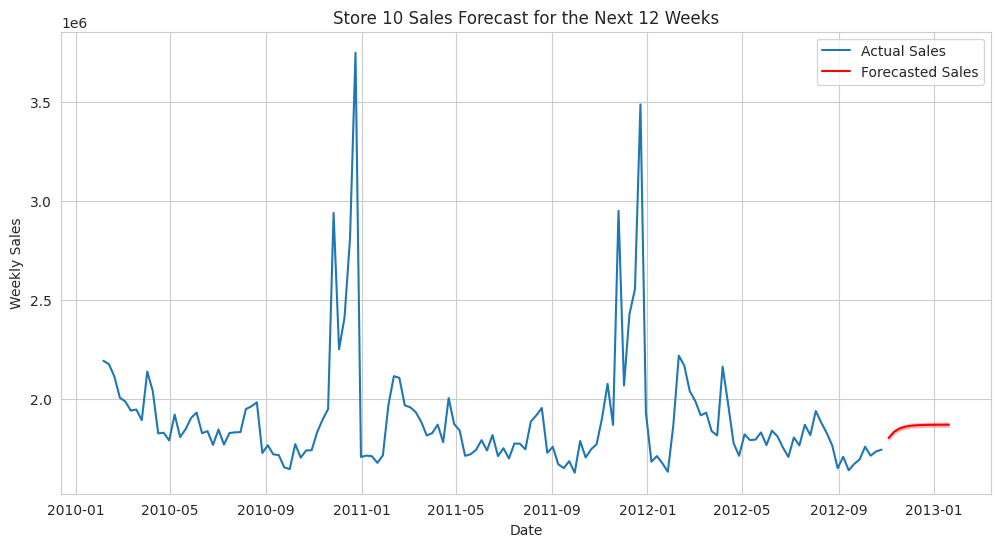

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)


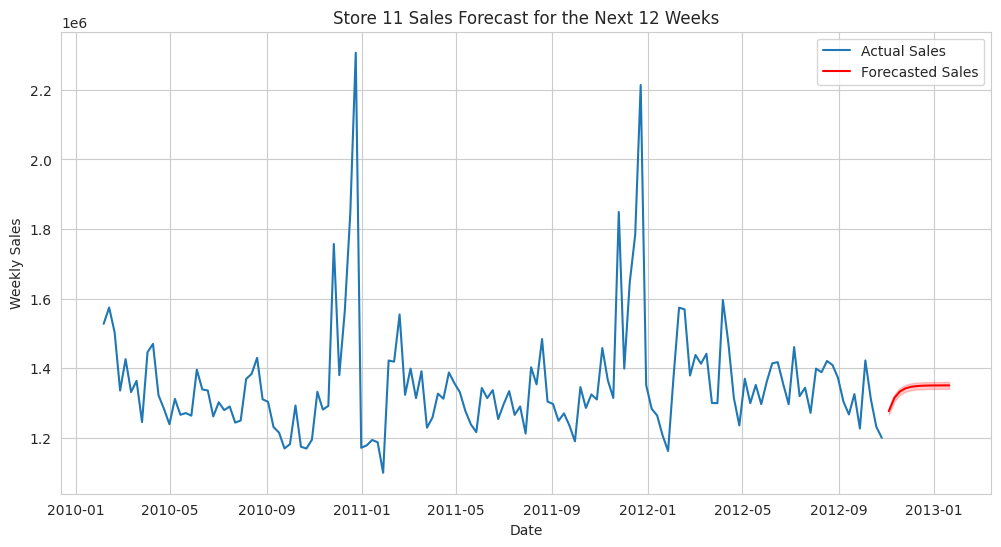

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)


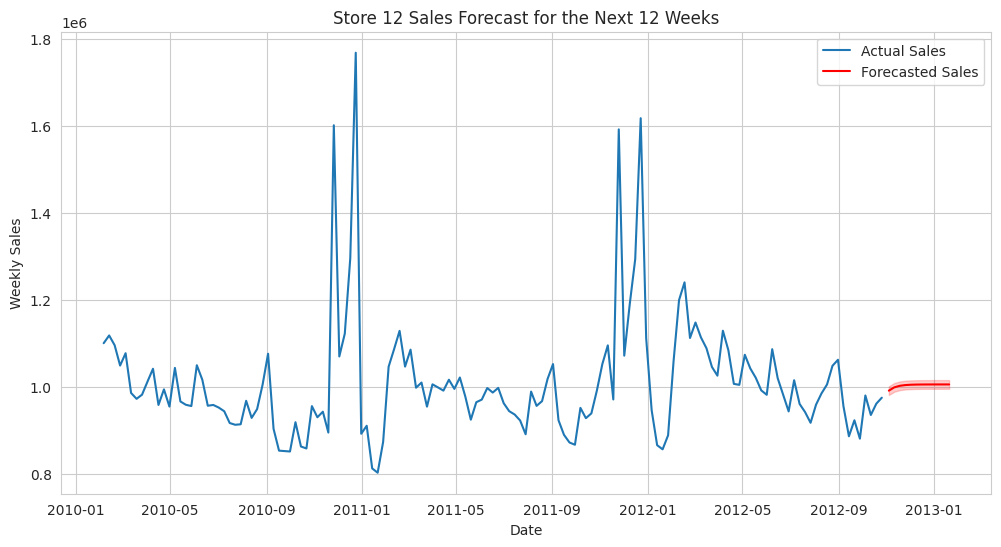

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)


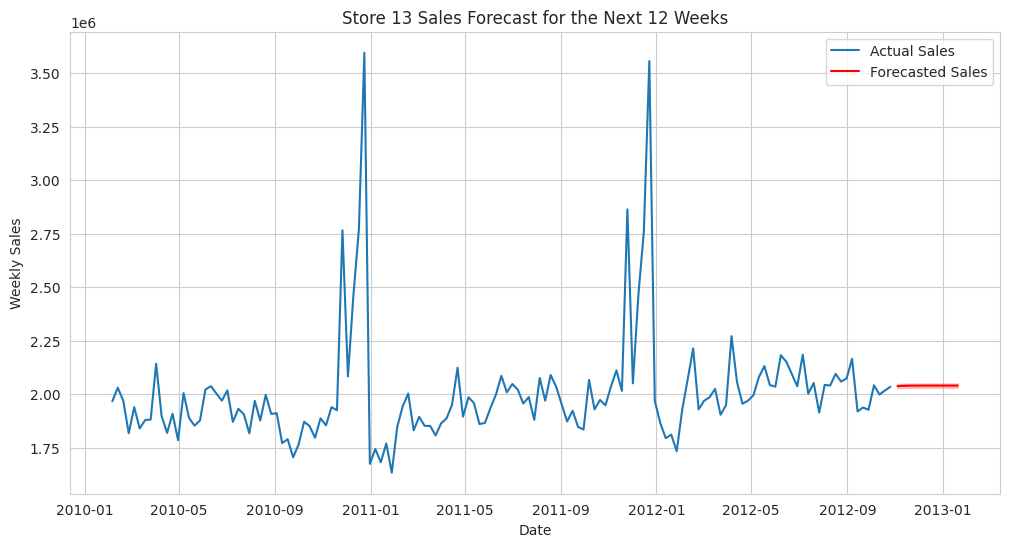

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)


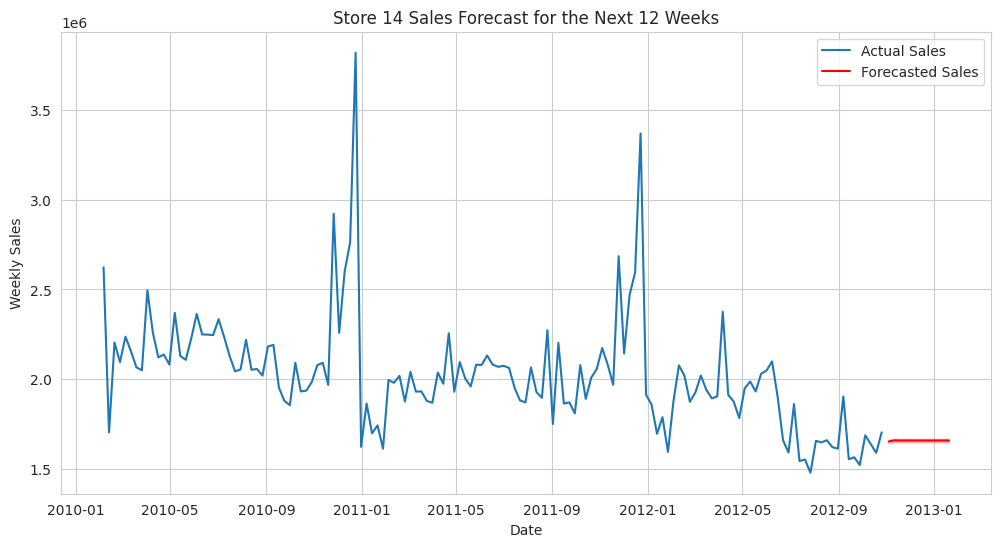

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)


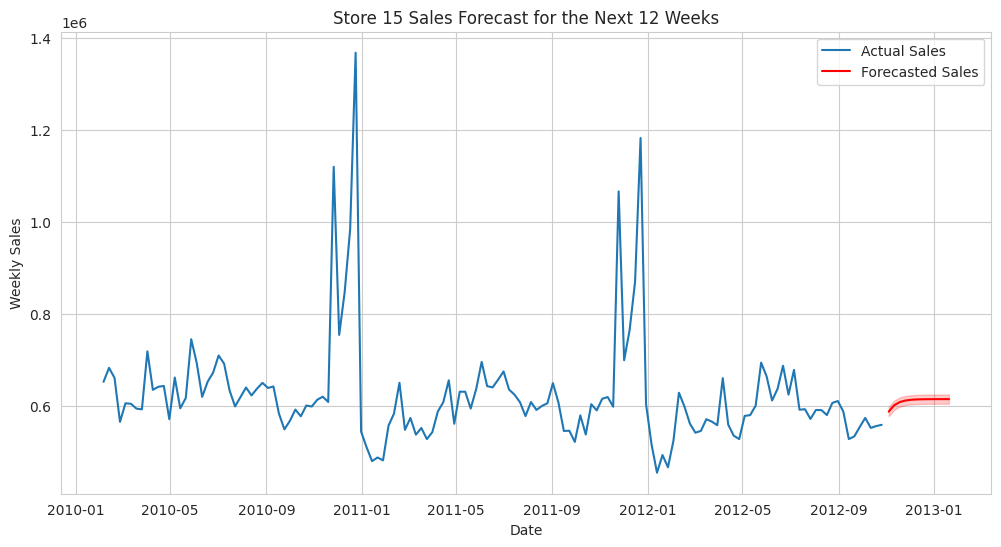

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)


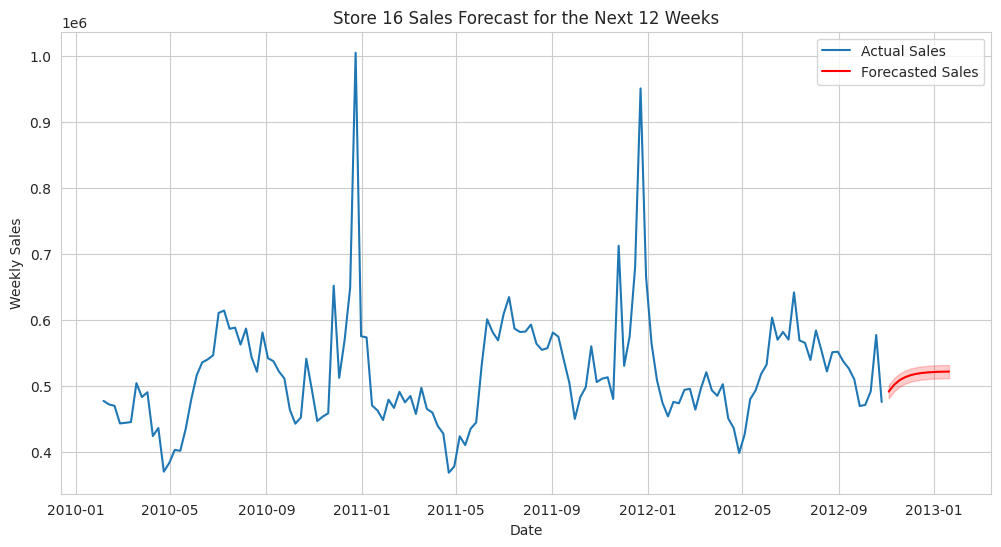

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)


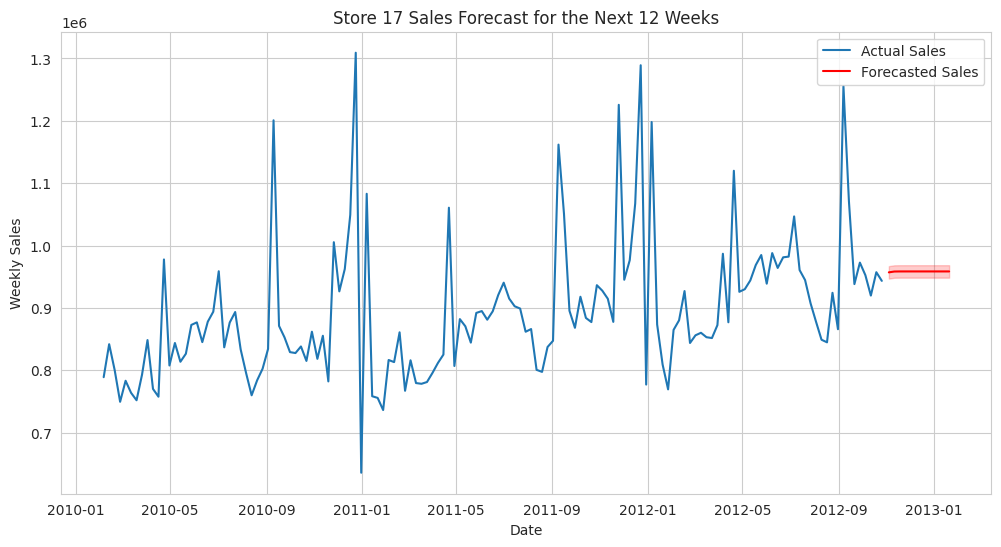

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)


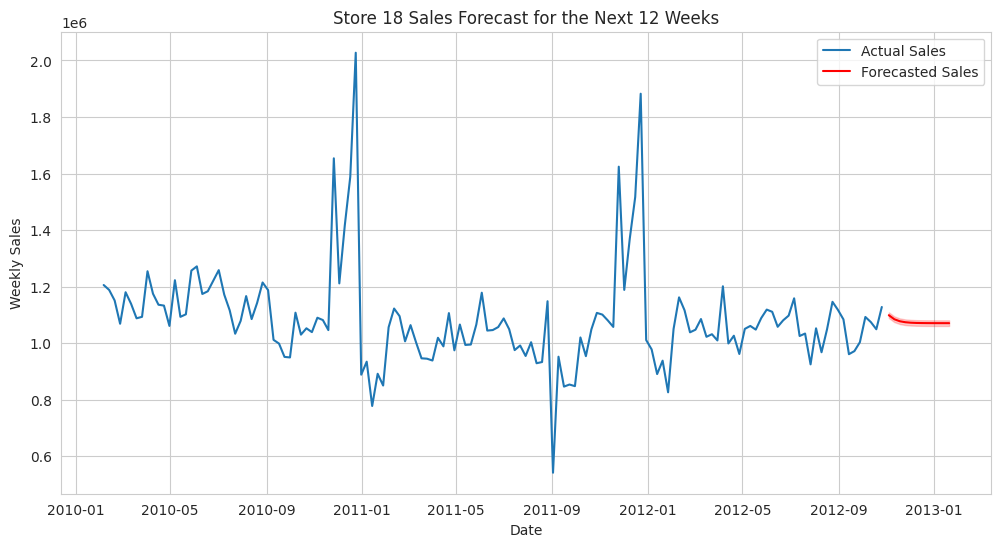

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)


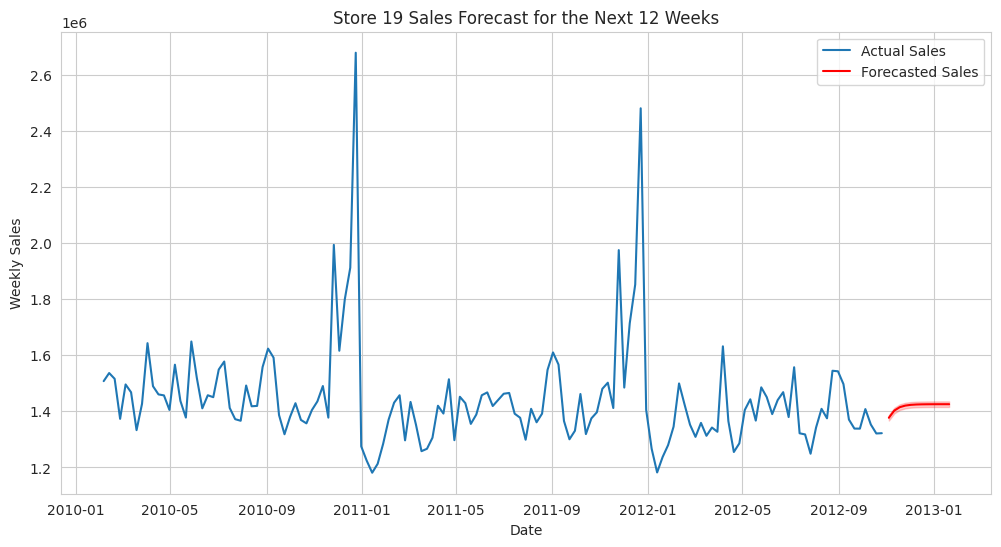

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)


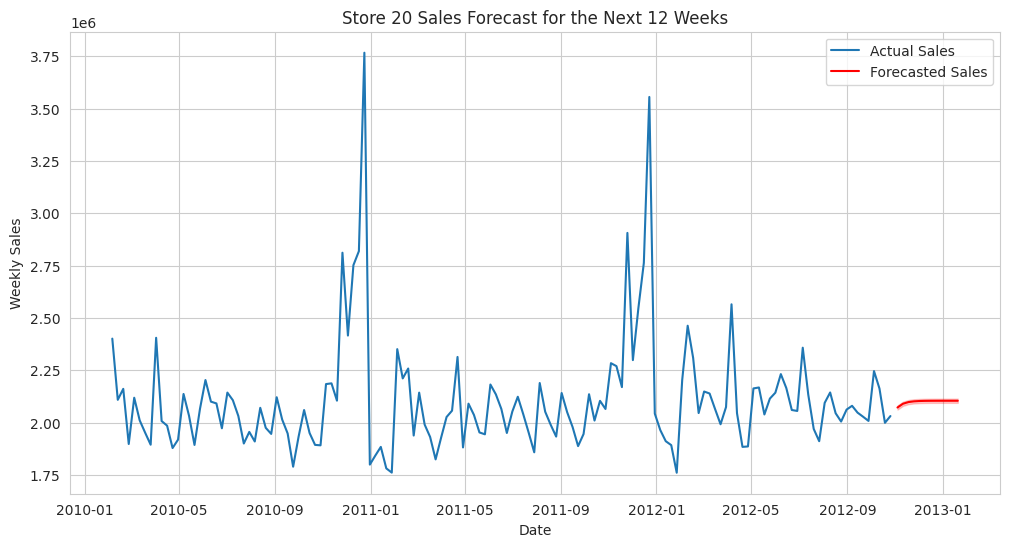

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


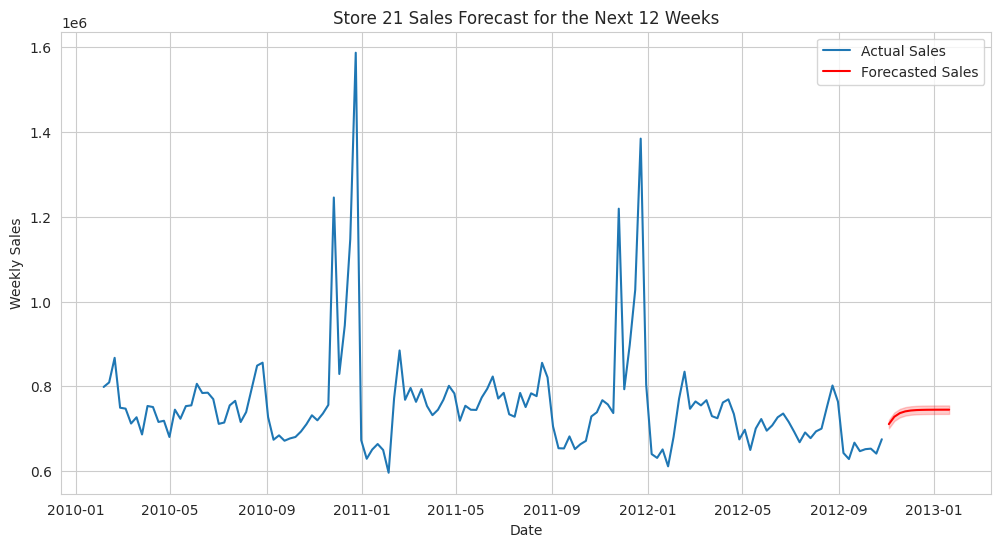

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)


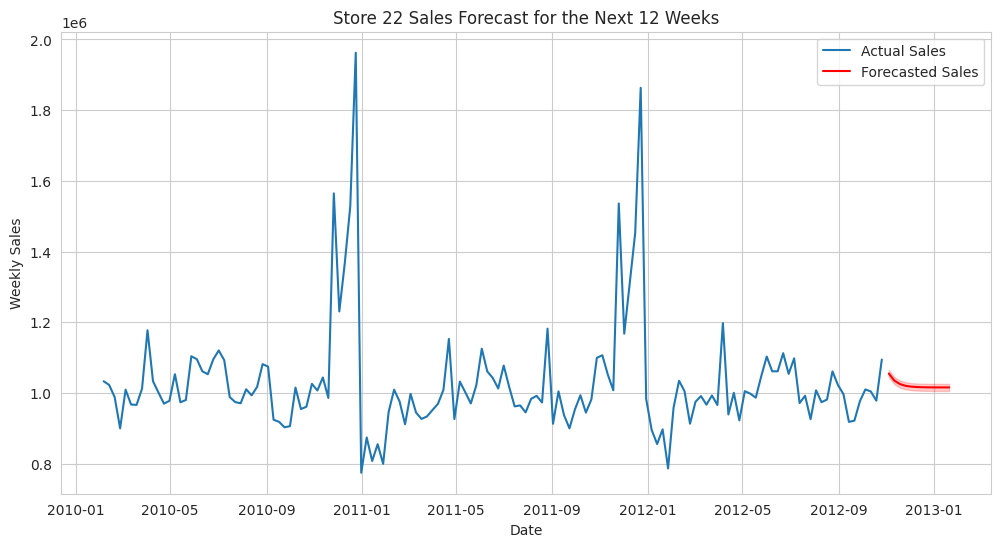

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)


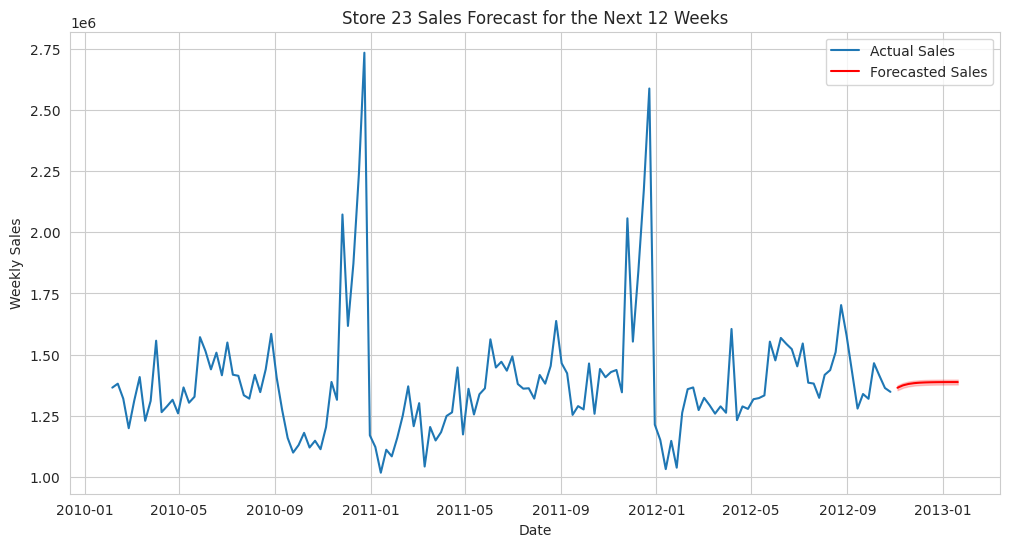

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)


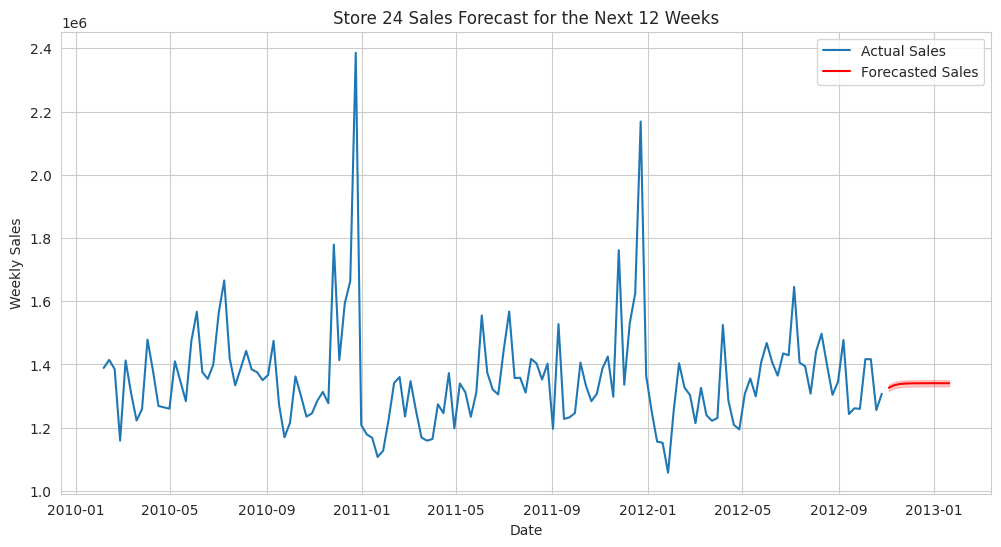

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)


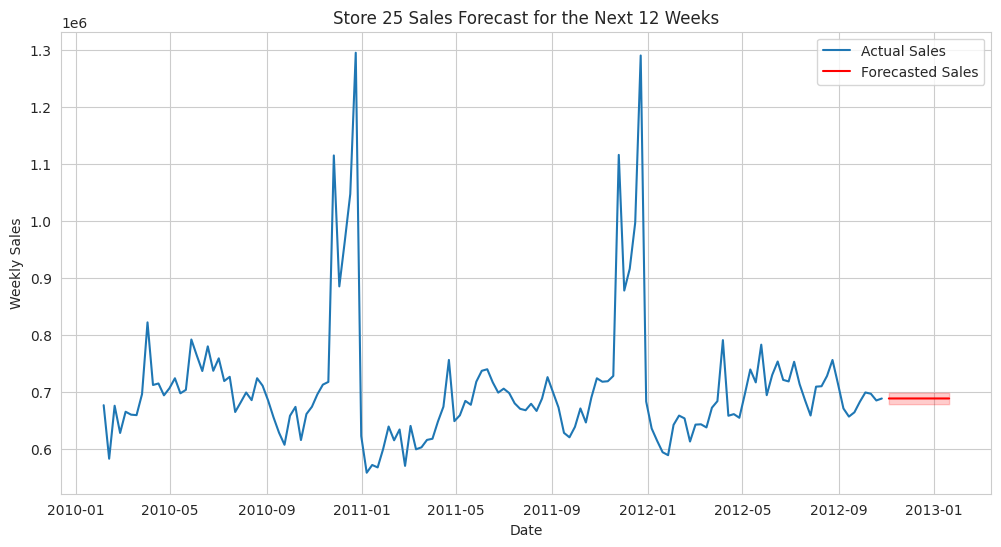

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)


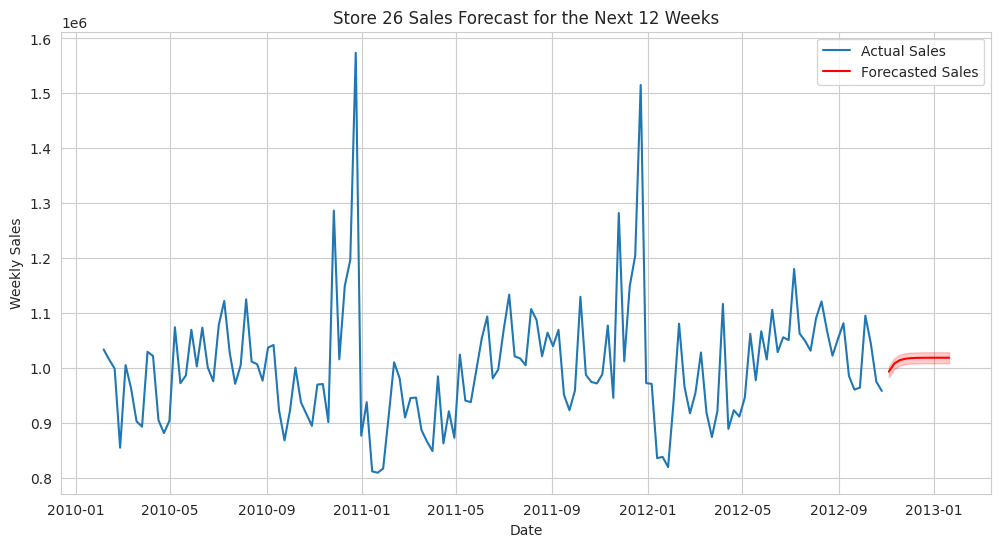

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)


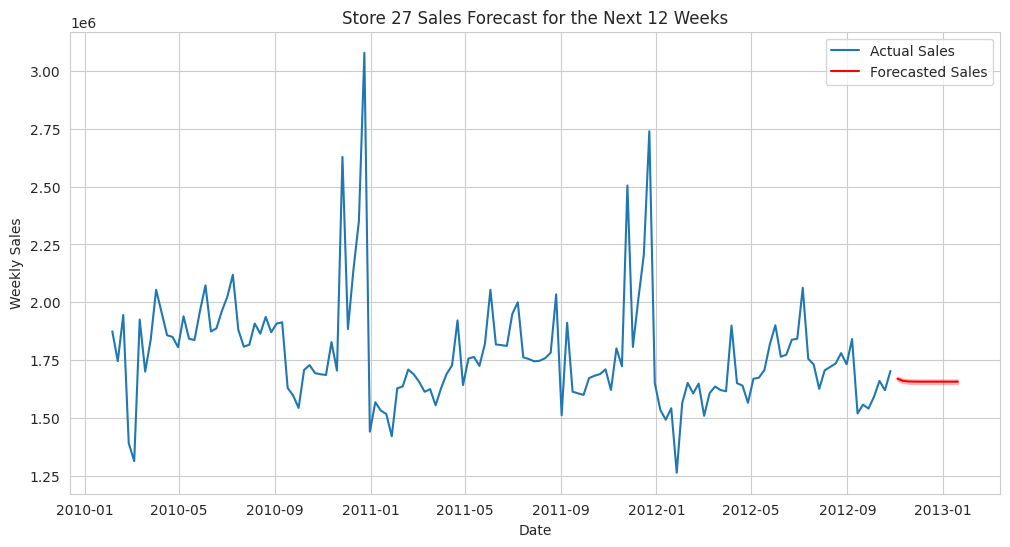

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


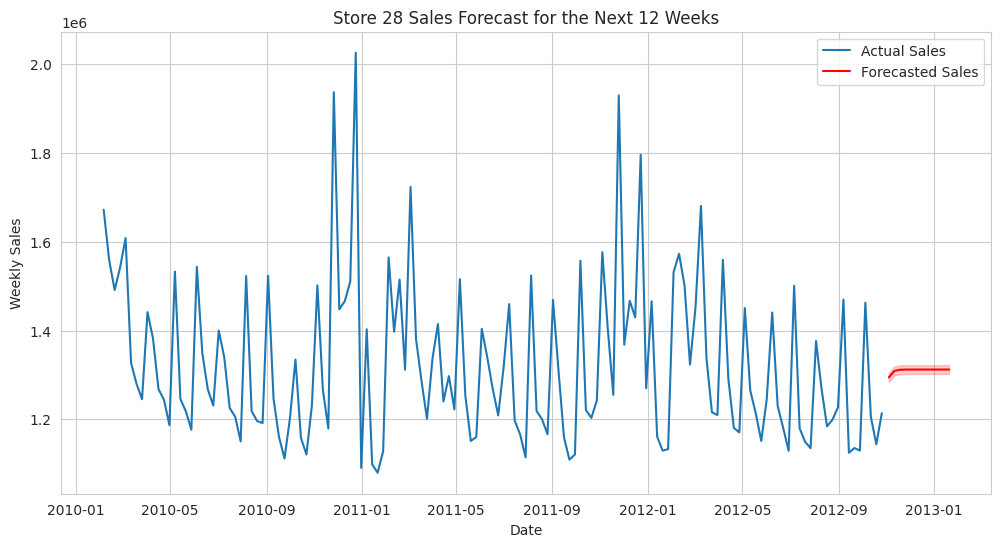

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)


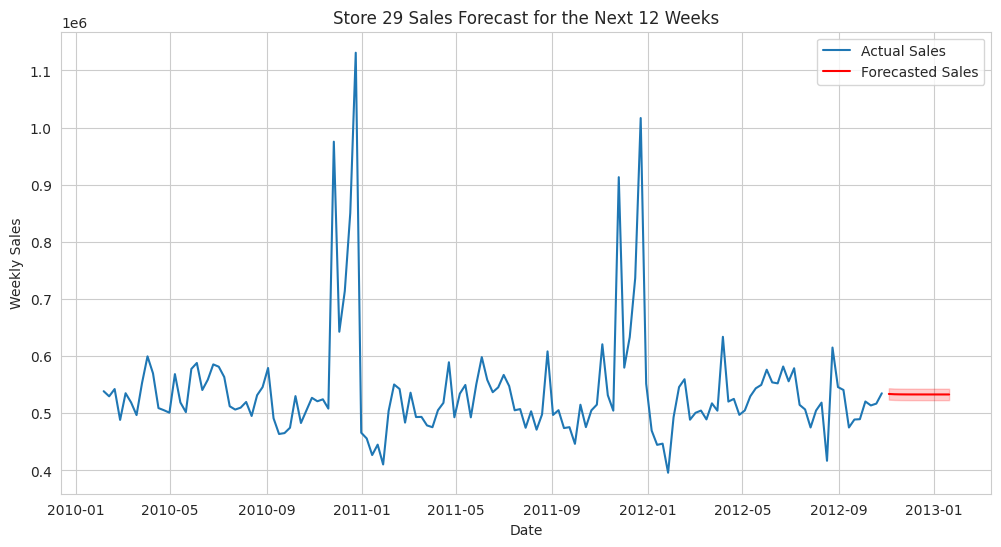

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)


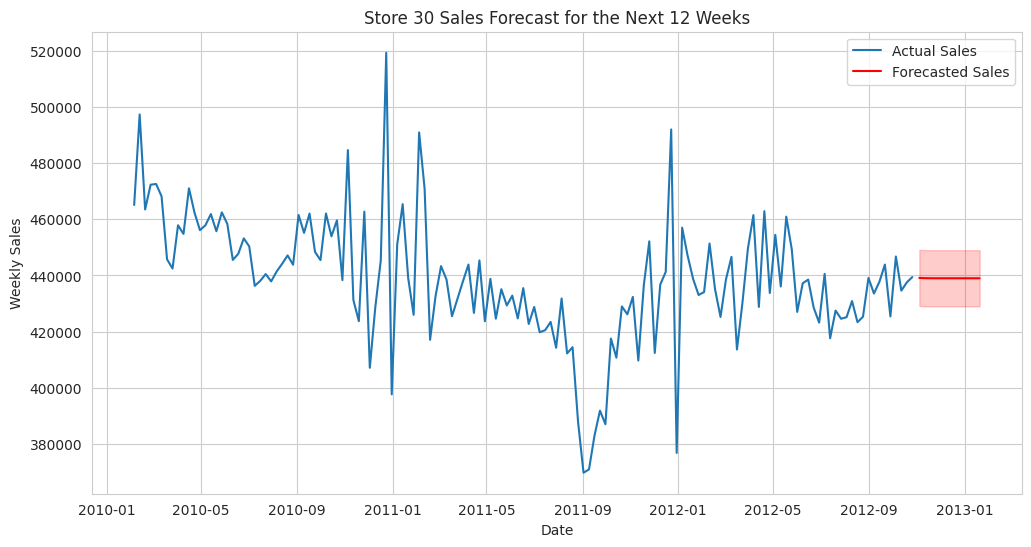

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)


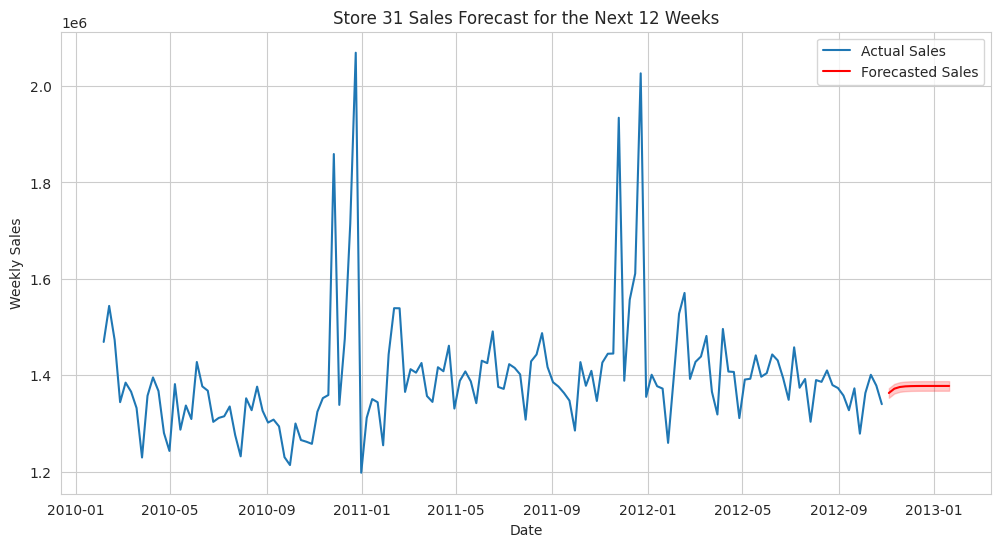

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)


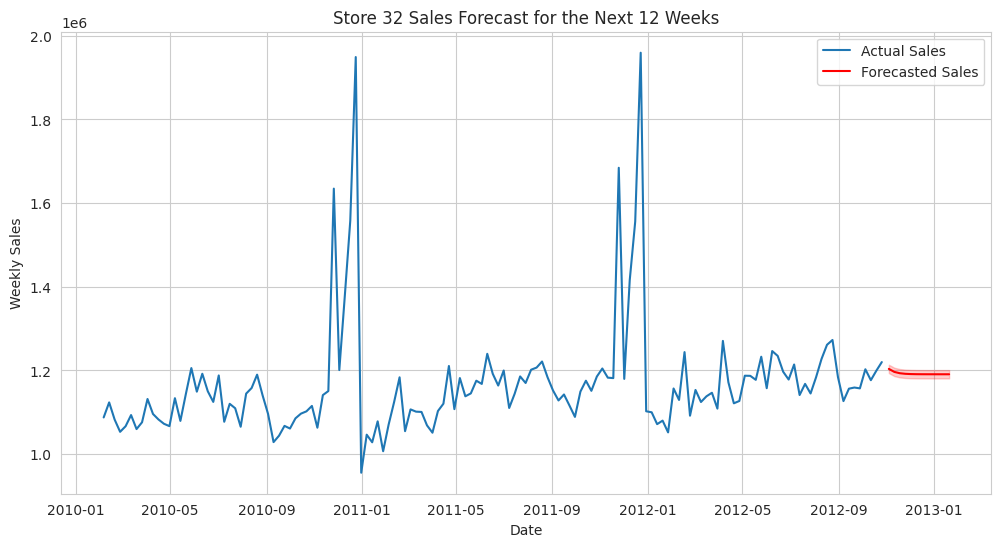

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters 

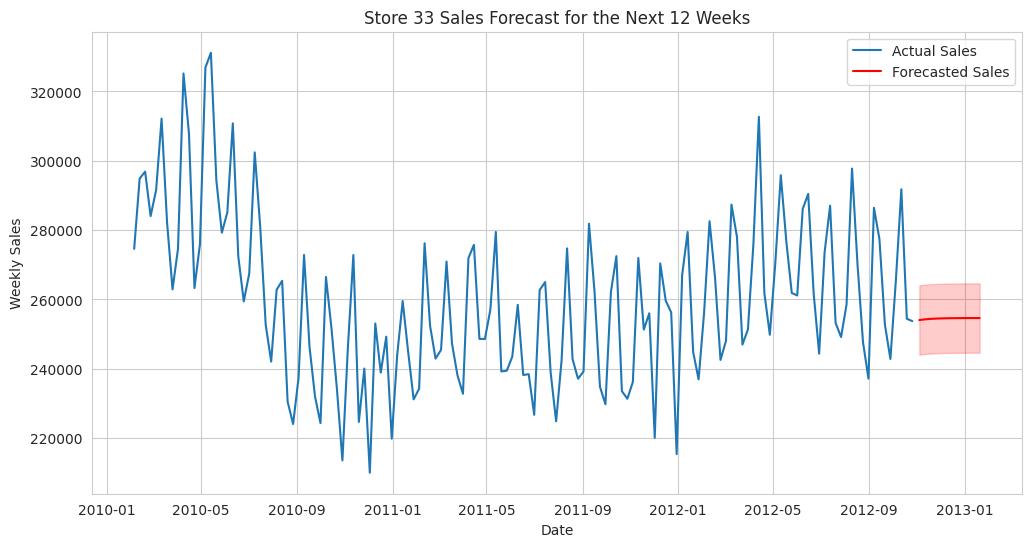

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)


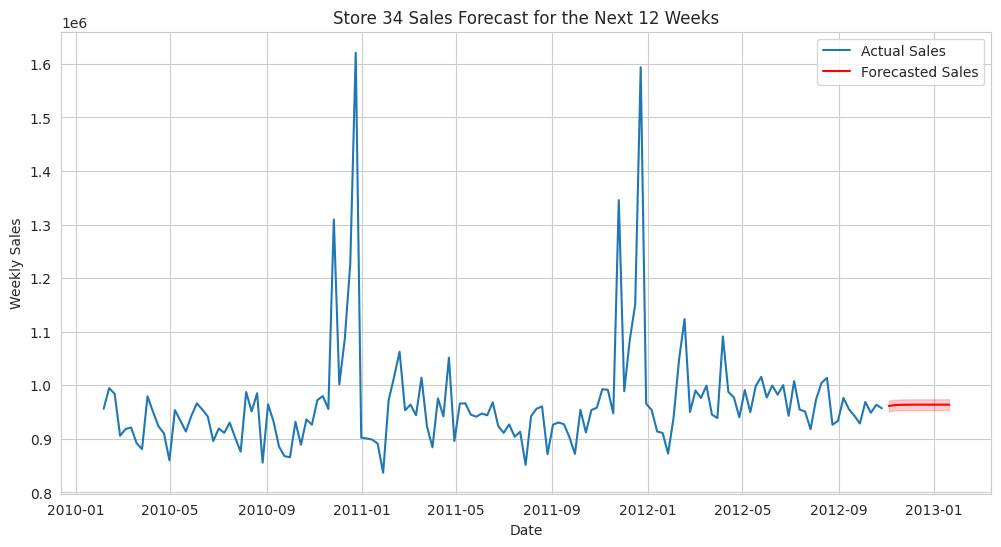

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)


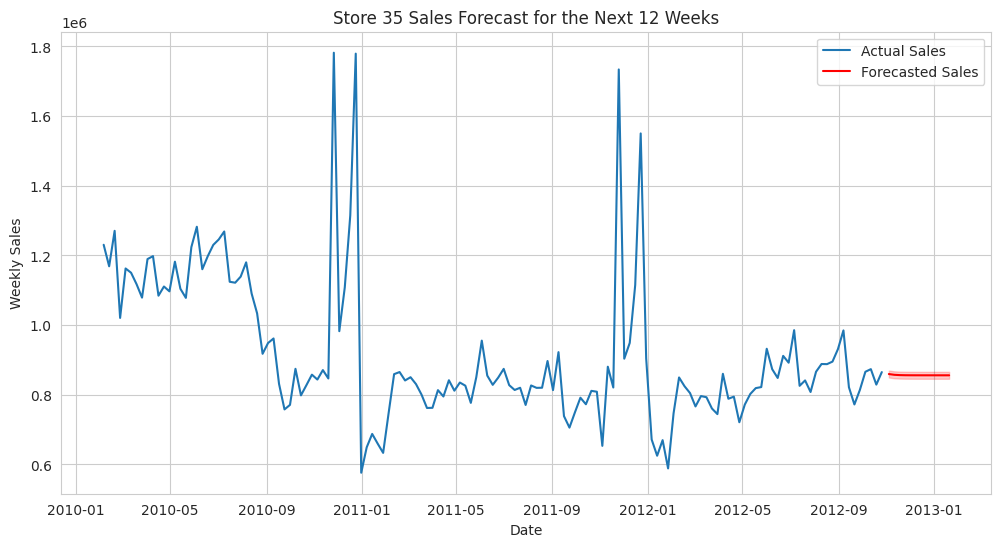

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters 

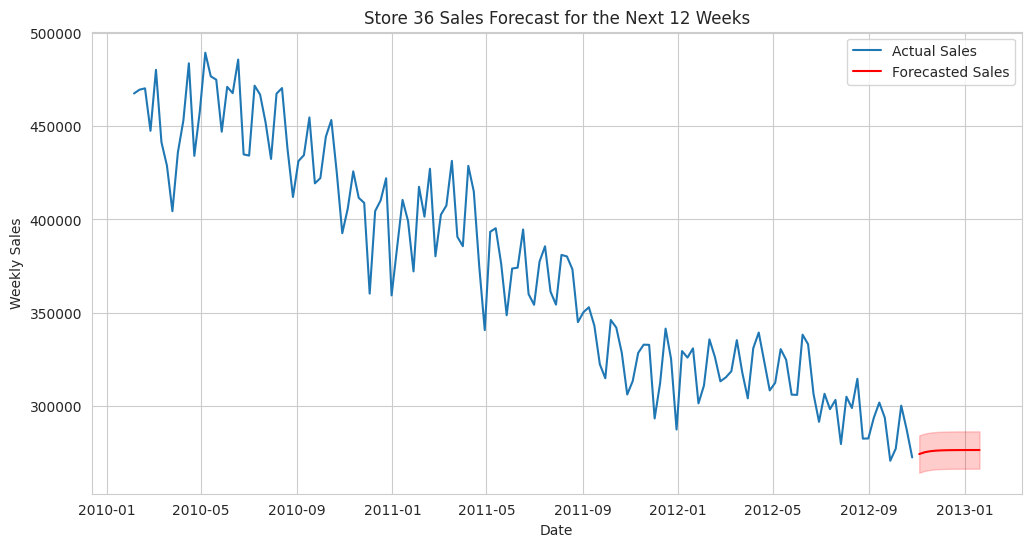

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)


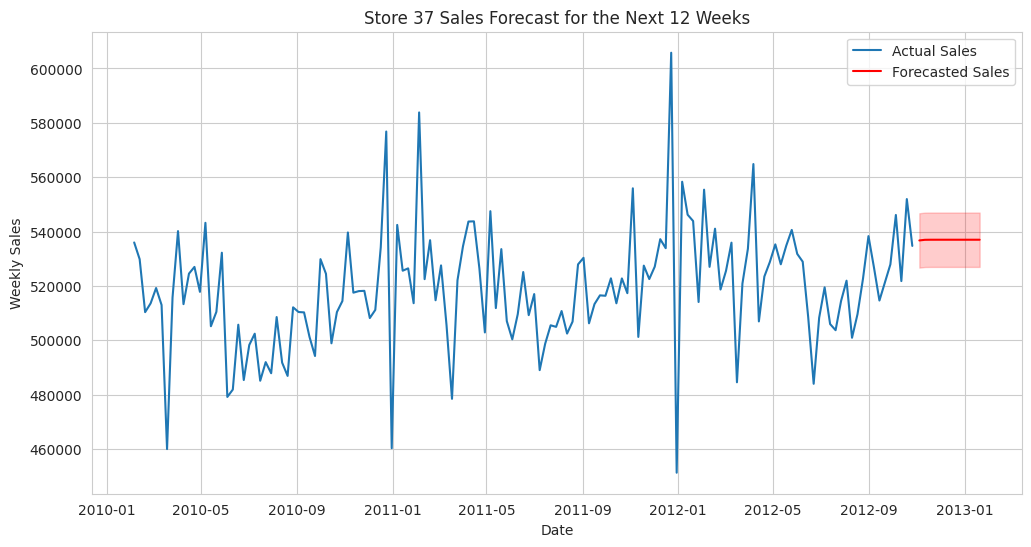

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


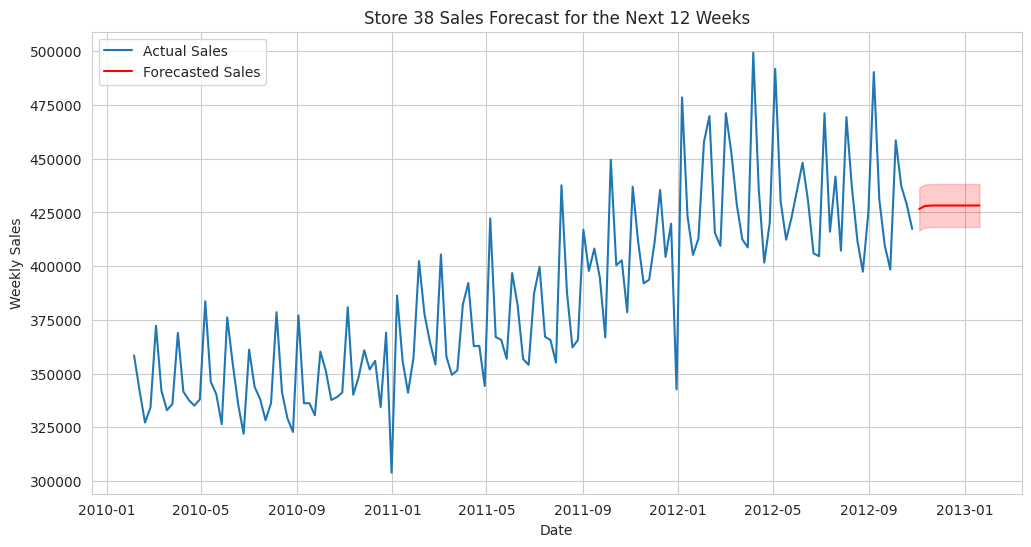

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)


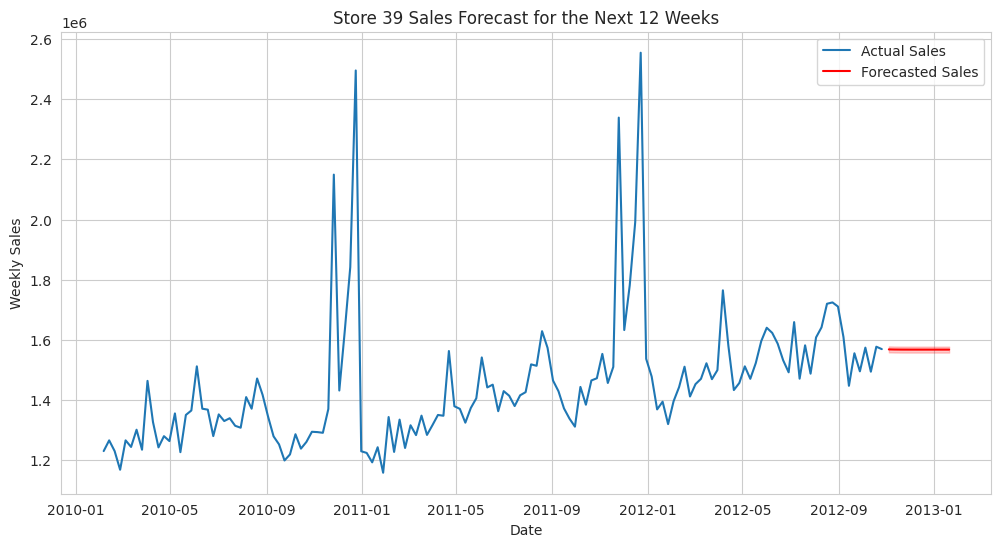

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)


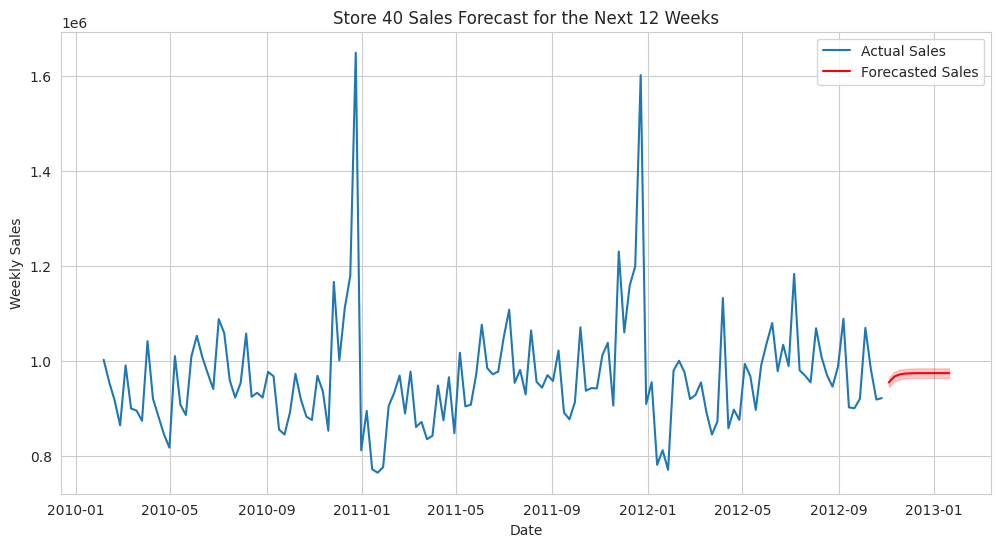

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)


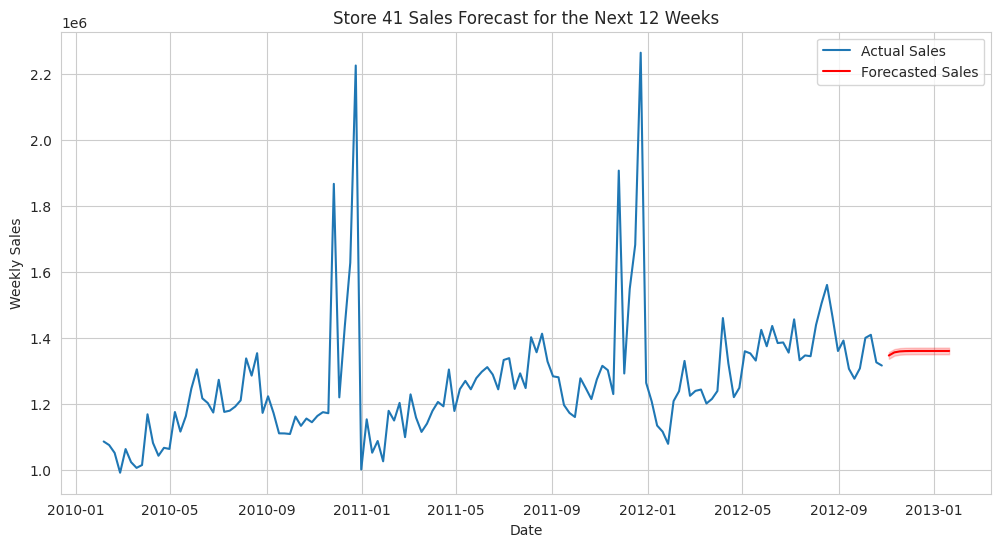

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


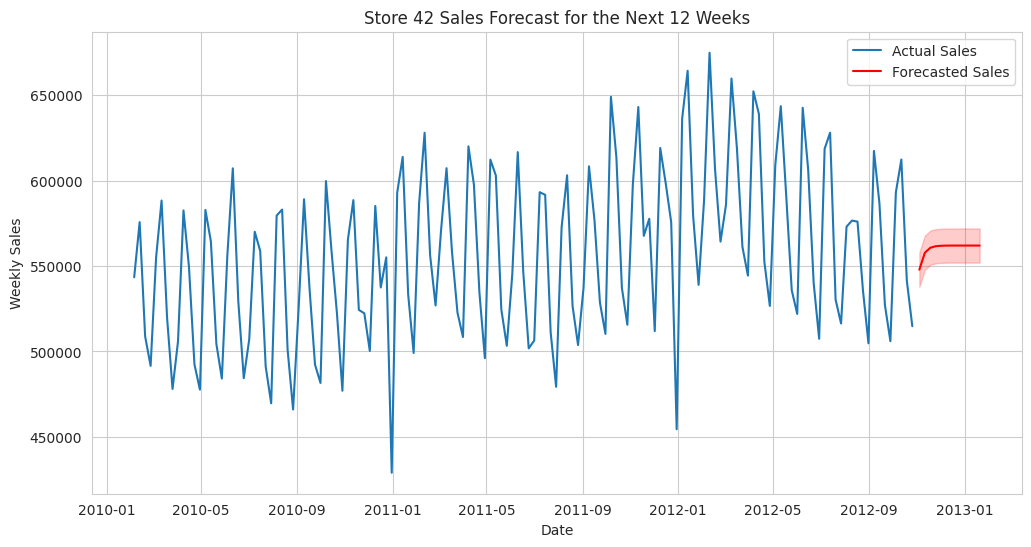

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


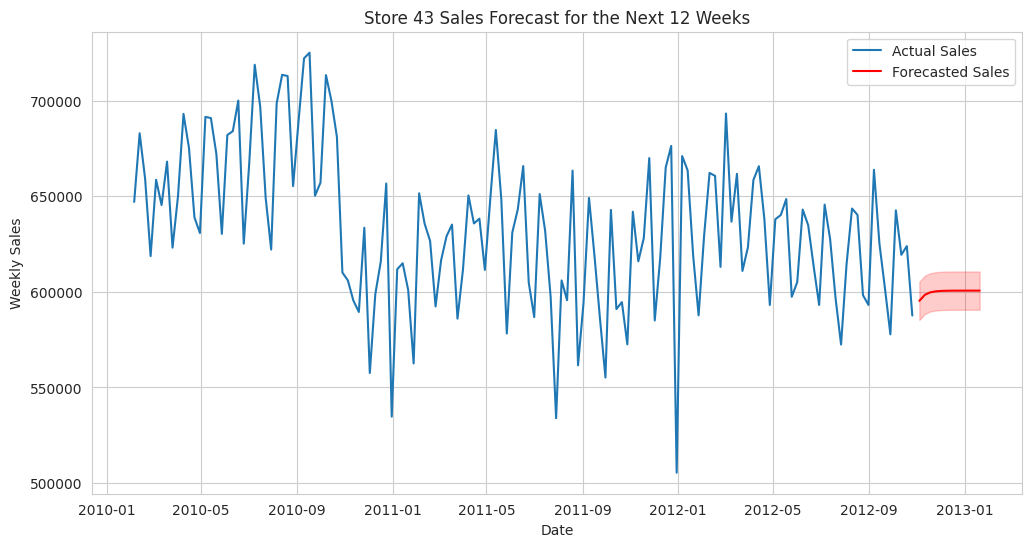

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)


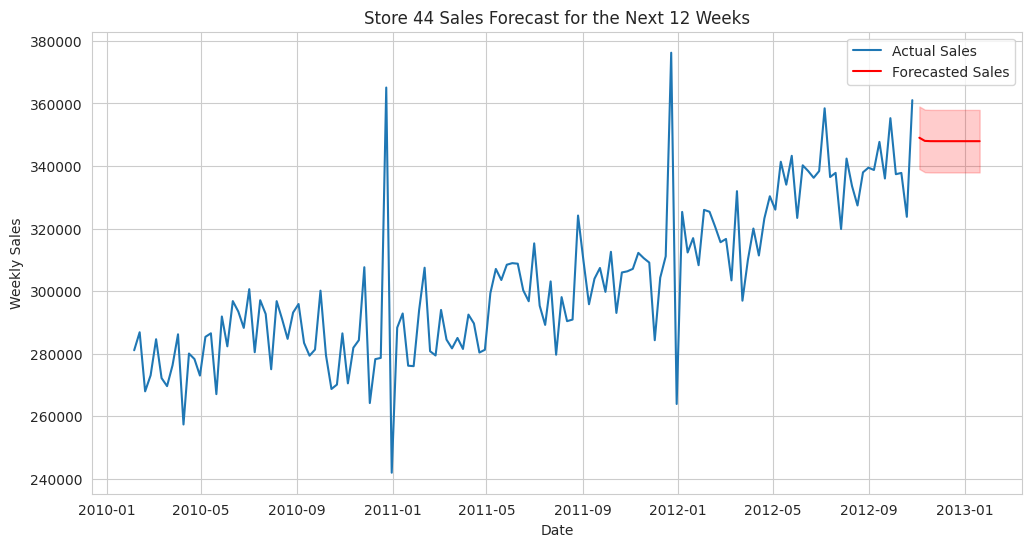

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)


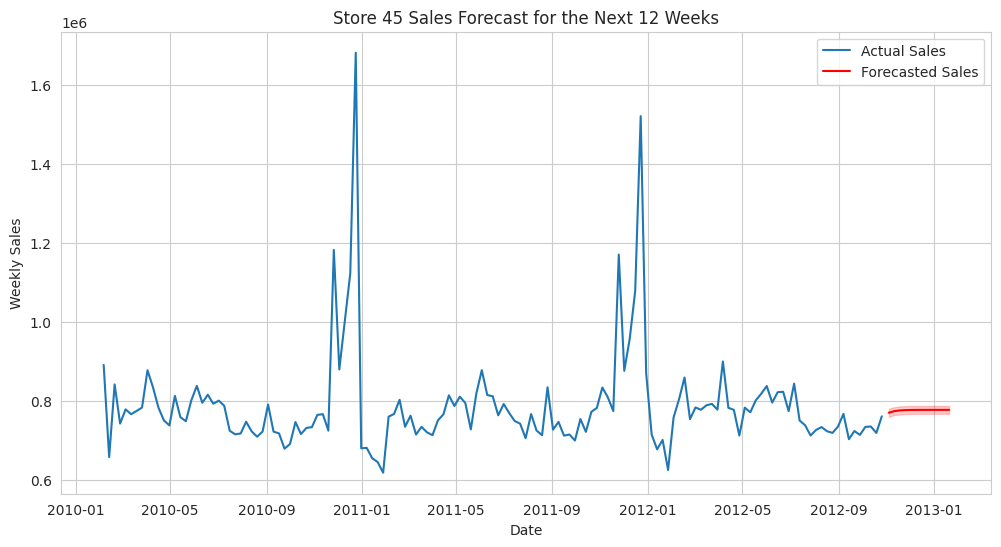

In [66]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
import pandas as pd

# Define the ARIMA model parameters
order = (1, 1, 1)  # Adjust as needed

# Iterate through each unique store
for store_id in store_ids:

    store_data = df[df['Store'] == store_id]['Weekly_Sales']

    # Fitting  ARIMA model
    model = ARIMA(store_data, order=order)
    fitted_model = model.fit()

    # Forecasting for next 12 weeks
    forecast_steps = 12
    forecast = fitted_model.forecast(steps=forecast_steps)


    forecast_dates = pd.date_range(store_data.index[-1], periods=forecast_steps + 1, freq='W')[1:]

    # Plot actual vs forecast
    plt.figure(figsize=(12, 6))
    plt.plot(store_data.index, store_data, label='Actual Sales')
    plt.plot(forecast_dates, forecast, color='red', label='Forecasted Sales')
    plt.fill_between(forecast_dates, forecast - 10000, forecast + 10000, color='red', alpha=0.2)  # Example confidence interval
    plt.title(f'Store {store_id} Sales Forecast for the Next 12 Weeks')
    plt.xlabel('Date')
    plt.ylabel('Weekly Sales')
    plt.legend()
    plt.show()
